# Responsi Komputasi Statistika II
Kelompok UAS B2
Anggota Kelompok
1. Mahardi Nalendra Syafa (22/502515/PA/21558)
2. Dzulfahmi Dzakia Ahmad (22/PA/498257/21500)
3. Ahmad Wildan Jauharul Fuad (22/504334/PA/21690)
4. Dara Oktavia Risti (22/504700/PA/21716)

# Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
import lightgbm as lgb
from lightgbm import LGBMRegressor
from lightgbm import LGBMClassifier
from imblearn.under_sampling import EditedNearestNeighbours
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# import QuadraticDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# import passive agressive classifier
from sklearn.linear_model import PassiveAggressiveClassifier

# import calibrated classifier
from sklearn.calibration import CalibratedClassifierCV

from sklearn.ensemble import (
    GradientBoostingClassifier,
    BaggingClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    ExtraTreesClassifier
)
from lightgbm import LGBMClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, PassiveAggressiveClassifier, RidgeClassifier, RidgeClassifierCV, SGDClassifier, Perceptron

from sklearn.metrics import classification_report

# Import accuracy, precision, recall, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Import precision_recall_fscore_support
from sklearn.metrics import precision_recall_fscore_support

# Data

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
sub = pd.read_csv('Dataset Responsi\submission_format.csv')
sub

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Dzulfahmi DA\AppData\Local\Temp\ipykernel_9632\2420103920.py:1: SyntaxWarning: invalid escape sequence '\s'
  sub = pd.read_csv('Dataset Responsi\submission_format.csv')


,ID,damage_grade
0,71840,5
1,85155,5
2,287066,5
3,124951,5
4,73581,5
...,...,...
77498,238185,5
77499,290899,5
77500,184490,5
77501,342028,5


In [ ]:
df = pd.read_csv('Dataset Responsi/train_features.csv')
df

,ID,floors_before_eq (total),old_building,plinth_area (ft^2),height_before_eq (ft),land_surface_condition,type_of_foundation,type_of_roof,type_of_ground_floor,type_of_other_floor,...,has_secondary_use,type_of_reinforcement_concrete,residential_type,no_family_residing,public_place_type,industrial_use_type,govermental_use_type,flexible_superstructure,wall_binding,wall_material
0,5054,Floor 3,26.0,300 ft^2,16.0,Flat,Clay mortar-Stone/Brick,Wood Light Roof or Bamboo Heavy Roof,Clay,TImber/Bamboo-Mud,...,0.0,0.0,Non-residential,1.0,Non-public,Non-industrial,Non-govermental,unavailable,5.0,2.0
1,166563,There is 2 Floor/Story,16.0,263 ft^2,18.0,Moderate slope,Mud mortar-Stone/Brick,Bamboo/TImber-Light Roof,mud,TImber/Bamboo-Mud,...,0.0,0.0,Non-residential,1.0,Non-public,Non-industrial,Non-govermental,unavailable,5.0,2.0
2,25330,Floor two,5.0,NaN,10.0,Flat,Clay Sand Mixed mortar-Stone/Brick,NaN,mud,Timber-Planck,...,0.0,0.0,Non-residential,1.0,Non-public,Non-industrial,Non-govermental,unavailable,5.0,2.0
3,60282,NaN,27.0,NaN,NaN,Flat,Clay Sand Mixed mortar-Stone/Brick,NaN,NaN,TImber/Bamboo-Mud,...,1.0,0.0,Hotel/Motel,1.0,Non-public,Non-industrial,Non-govermental,unavailable,5.0,2.0
4,194414,1,6.0,380 ft^2,6.0,Moderate slope,Clay mortar-Stone/Brick,Bamboo or Timber Light roof,Clay,Not applicable,...,0.0,0.0,Non-residential,1.0,Non-public,Non-industrial,Non-govermental,unavailable,5.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310004,253891,just 2 floor,6.0,192 ft^2,14.0,Flat,Clay mortar-Stone/Brick,Bamboo/TImber-Heavy Roof,Clay,rcc/rb/rbc,...,1.0,0.0,Hotel/Motel,NaN,Non-public,Non-industrial,Non-govermental,unavailable,5.0,2.0
310005,4279,2,50.0,310 ft^2,22.0,Flat,Clay mortar-Stone/Brick,Wood Light Roof or Bamboo Heavy Roof,Clay,TImber/Bamboo-Mud,...,0.0,0.0,Non-residential,1.0,Non-public,Non-industrial,Non-govermental,unavailable,5.0,2.0
310006,352159,Floor-three,22.0,528 ft^2,18.0,Flat,Clay Sand Mixed mortar-Stone/Brick,Wood Light Roof or Bamboo Light Roof,mud,TImber/Bamboo-Mud,...,0.0,0.0,Non-residential,1.0,Non-public,Non-industrial,Non-govermental,unavailable,5.0,2.0
310007,257848,floor two,25.0,520 ft^2,16.0,Flat,Clay Sand Mixed mortar-Stone/Brick,Bamboo/Timber Light roof,Clay,TImber/Bamboo-Mud,...,1.0,0.0,Hotel/Motel,NaN,Non-public,Non-industrial,Non-govermental,unavailable,5.0,2.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310009 entries, 0 to 310008
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   ID                              310009 non-null  int64  
 1   floors_before_eq (total)        282223 non-null  object 
 2   old_building                    307150 non-null  float64
 3   plinth_area (ft^2)              240977 non-null  object 
 4   height_before_eq (ft)           282223 non-null  float64
 5   land_surface_condition          292578 non-null  object 
 6   type_of_foundation              307150 non-null  object 
 7   type_of_roof                    240977 non-null  object 
 8   type_of_ground_floor            282223 non-null  object 
 9   type_of_other_floor             292578 non-null  object 
 10  position                        289075 non-null  object 
 11  building_plan_configuration     292578 non-null  object 
 12  technical_soluti

In [ ]:
df2 = pd.read_csv('Dataset Responsi/train_label.csv')
df2

,ID,damage_grade
0,5054,5
1,166563,5
2,25330,2
3,60282,5
4,194414,4
...,...,...
310004,253891,4
310005,4279,5
310006,352159,5
310007,257848,5


In [ ]:
df3 = pd.read_csv('Dataset Responsi/test_features.csv')
df3

,ID,floors_before_eq (total),old_building,plinth_area (ft^2),height_before_eq (ft),land_surface_condition,type_of_foundation,type_of_roof,type_of_ground_floor,type_of_other_floor,...,has_secondary_use,type_of_reinforcement_concrete,residential_type,no_family_residing,public_place_type,industrial_use_type,govermental_use_type,flexible_superstructure,wall_binding,wall_material
0,71840,floor third,20.0,374 ft^2,21.0,Flat,Clay mortar-Stone/Brick,Wood Light Roof or Bamboo Light Roof,Clay,TImber/Bamboo-Mud,...,0.0,0.0,Non-residential,1.0,Non-public,Non-industrial,Non-govermental,unavailable,5.0,2.0
1,85155,Floor two,26.0,364 ft^2,16.0,Flat,Clay mortar-Stone/Brick,Wood Light Roof or Bamboo Light Roof,Clay,TImber/Bamboo-Mud,...,0.0,0.0,Non-residential,1.0,Non-public,Non-industrial,Non-govermental,unavailable,5.0,2.0
2,287066,NaN,6.0,NaN,NaN,NaN,Clay mortar-Stone/Brick,NaN,NaN,NaN,...,1.0,0.0,Non-residential,1.0,Non-public,Infrastructure,Non-govermental,unavailable,5.0,2.0
3,124951,There is 2 Floor/Story,25.0,345 ft^2,12.0,Moderate slope,Clay mortar-Stone/Brick,Wood Light Roof or Bamboo Light Roof,Clay,Wood-Plank,...,0.0,0.0,Non-residential,1.0,Non-public,Non-industrial,Non-govermental,unavailable,5.0,2.0
4,73581,Three,25.0,324 ft^2,14.0,Moderate slope,Clay mortar-Stone/Brick,Wood Light Roof or Bamboo Heavy Roof,Mud,Lumber-plank,...,0.0,0.0,Non-residential,NaN,Non-public,Non-industrial,Non-govermental,unavailable,5.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77498,238185,Floor two,17.0,NaN,15.0,Moderate slope,Clay mortar-Stone/Brick,NaN,Clay,TImber/Bamboo-Mud,...,0.0,0.0,Non-residential,1.0,Non-public,Non-industrial,Non-govermental,available,5.0,2.0
77499,290899,floor 1st,3.0,90 ft^2,7.0,Flat,Clay Sand Mixed mortar-Stone/Brick,Bamboo/Timber Light roof,Clay,Not applicable,...,0.0,0.0,Non-residential,1.0,Non-public,Non-industrial,Non-govermental,unavailable,5.0,2.0
77500,184490,floor third,15.0,395 ft^2,18.0,Flat,Clay Sand Mixed mortar-Stone/Brick,Bamboo/TImber-Light Roof,Clay,TImber/Bamboo-Mud,...,0.0,0.0,Non-residential,1.0,Non-public,Non-industrial,Non-govermental,unavailable,5.0,2.0
77501,342028,Three,4.0,262 ft^2,24.0,Flat,Clay Sand Mixed mortar-Stone/Brick,Bamboo/Timber Light roof,Clay,TImber/Bamboo-Mud,...,0.0,0.0,Non-residential,1.0,Non-public,Non-industrial,Non-govermental,unavailable,5.0,2.0


In [ ]:
# Menggabungkan df dan df2 sesuai dengan 'id'
df4 = pd.merge(df, df2, on='ID')
df4

,ID,floors_before_eq (total),old_building,plinth_area (ft^2),height_before_eq (ft),land_surface_condition,type_of_foundation,type_of_roof,type_of_ground_floor,type_of_other_floor,...,type_of_reinforcement_concrete,residential_type,no_family_residing,public_place_type,industrial_use_type,govermental_use_type,flexible_superstructure,wall_binding,wall_material,damage_grade
0,5054,Floor 3,26.0,300 ft^2,16.0,Flat,Clay mortar-Stone/Brick,Wood Light Roof or Bamboo Heavy Roof,Clay,TImber/Bamboo-Mud,...,0.0,Non-residential,1.0,Non-public,Non-industrial,Non-govermental,unavailable,5.0,2.0,5
1,166563,There is 2 Floor/Story,16.0,263 ft^2,18.0,Moderate slope,Mud mortar-Stone/Brick,Bamboo/TImber-Light Roof,mud,TImber/Bamboo-Mud,...,0.0,Non-residential,1.0,Non-public,Non-industrial,Non-govermental,unavailable,5.0,2.0,5
2,25330,Floor two,5.0,NaN,10.0,Flat,Clay Sand Mixed mortar-Stone/Brick,NaN,mud,Timber-Planck,...,0.0,Non-residential,1.0,Non-public,Non-industrial,Non-govermental,unavailable,5.0,2.0,2
3,60282,NaN,27.0,NaN,NaN,Flat,Clay Sand Mixed mortar-Stone/Brick,NaN,NaN,TImber/Bamboo-Mud,...,0.0,Hotel/Motel,1.0,Non-public,Non-industrial,Non-govermental,unavailable,5.0,2.0,5
4,194414,1,6.0,380 ft^2,6.0,Moderate slope,Clay mortar-Stone/Brick,Bamboo or Timber Light roof,Clay,Not applicable,...,0.0,Non-residential,1.0,Non-public,Non-industrial,Non-govermental,unavailable,5.0,2.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310004,253891,just 2 floor,6.0,192 ft^2,14.0,Flat,Clay mortar-Stone/Brick,Bamboo/TImber-Heavy Roof,Clay,rcc/rb/rbc,...,0.0,Hotel/Motel,NaN,Non-public,Non-industrial,Non-govermental,unavailable,5.0,2.0,4
310005,4279,2,50.0,310 ft^2,22.0,Flat,Clay mortar-Stone/Brick,Wood Light Roof or Bamboo Heavy Roof,Clay,TImber/Bamboo-Mud,...,0.0,Non-residential,1.0,Non-public,Non-industrial,Non-govermental,unavailable,5.0,2.0,5
310006,352159,Floor-three,22.0,528 ft^2,18.0,Flat,Clay Sand Mixed mortar-Stone/Brick,Wood Light Roof or Bamboo Light Roof,mud,TImber/Bamboo-Mud,...,0.0,Non-residential,1.0,Non-public,Non-industrial,Non-govermental,unavailable,5.0,2.0,5
310007,257848,floor two,25.0,520 ft^2,16.0,Flat,Clay Sand Mixed mortar-Stone/Brick,Bamboo/Timber Light roof,Clay,TImber/Bamboo-Mud,...,0.0,Hotel/Motel,NaN,Non-public,Non-industrial,Non-govermental,unavailable,5.0,2.0,5


# Preprocesing I : Pembenahan Typo

In [ ]:
df4.columns

Index(['ID', 'floors_before_eq (total)', 'old_building', 'plinth_area (ft^2)',
       'height_before_eq (ft)', 'land_surface_condition', 'type_of_foundation',
       'type_of_roof', 'type_of_ground_floor', 'type_of_other_floor',
       'position', 'building_plan_configuration',
       'technical_solution_proposed', 'legal_ownership_status',
       'has_secondary_use', 'type_of_reinforcement_concrete',
       'residential_type', 'no_family_residing', 'public_place_type',
       'industrial_use_type', 'govermental_use_type',
       'flexible_superstructure', 'wall_binding', 'wall_material',
       'damage_grade'],
      dtype='object')

In [ ]:
# Unique values pada kolom 'floors_before_eq'
df4['floors_before_eq (total)'].unique()

array(['Floor 3', 'There is 2 Floor/Story', 'Floor two', nan, '1',
       'Has 1 floor', ' has 3 Floor', 'one', 'Three', 'Floor 1',
       ' just 2 floor', 'two', 'five Floor', '2 floor', '2',
       'floor second', '3', 'floor two', 'Two Floor', 'floor 1st',
       'two story', 'three Story', 'Three floor', 'Floor 2',
       'Floor-three', 'Just 1 floor', 'floor one', '5', 'one story',
       '1st Story', 'Four Story', 'four Floor', 'floor third',
       'floor four', '4', ' has Four fl', 'Fl four', 'Floor 4', 'Four',
       ' Has Five fl', 'fifth', 'Floor Fifth', 'Fl Five', '6', '7', '8',
       '9', 'Has Five fl'], dtype=object)

In [ ]:
df3['floors_before_eq (total)'].unique()

array(['floor third', 'Floor two', nan, 'There is 2 Floor/Story', 'Three',
       '2 floor', 'Has 1 floor', '3', 'Two Floor', 'floor 1st',
       'Floor-three', 'two story', 'three Story', 'two', 'floor two',
       'Floor 2', 'one story', '2', 'Three floor', 'floor one',
       ' just 2 floor', 'Fl four', '1st Story', ' has 3 Floor',
       'floor second', '4', 'Just 1 floor', 'one', 'Floor 3', '1',
       'Floor 1', 'Floor Fifth', 'fifth', 'Floor 4', 'Fl Five',
       'floor four', 'four Floor', '6', 'five Floor', '5', 'Four Story',
       'Four', ' has Four fl', '8', ' Has Five fl', '7', '9'],
      dtype=object)

In [ ]:
# Print panjang df3 dan df4 yang unik
print(len(df3['floors_before_eq (total)'].unique()))
print(len(df4['floors_before_eq (total)'].unique()))

47
48


In [ ]:
# Array yang diberikan
data1 = np.array(df4['floors_before_eq (total)'].unique())

data2 = np.array(df3['floors_before_eq (total)'].unique())

# Menghapus nilai NaN dari kedua array
data1 = data1[~pd.isnull(data1)]
data2 = data2[~pd.isnull(data2)]

# Mengubah array menjadi set untuk membandingkan
set_data1 = set(data1)
set_data2 = set(data2)

# Mencari elemen yang ada di data1 tetapi tidak ada di data2
difference1 = set_data1 - set_data2

# Mencari elemen yang ada di data2 tetapi tidak ada di data1
difference2 = set_data2 - set_data1

# Menampilkan perbedaan
difference1, difference2


({'Has Five fl'}, set())

Terlihat di data test tidak ada 'has five f1'

In [ ]:
floor_correction_dict = {
    'Floor 3': 3,
    'There is 2 Floor/Story': 2,
    'Floor two': 2,
    '1': 1,
    'Has 1 floor': 1,
    ' has 3 Floor': 3,
    'one': 1,
    'Three': 3,
    'Floor 1': 1,
    ' just 2 floor': 2,
    'two': 2,
    'five Floor': 5,
    '2 floor': 2,
    '2': 2,
    'floor second': 2,
    '3': 3,
    'floor two': 2,
    'Two Floor': 2,
    'floor 1st': 1,
    'two story': 2,
    'three Story': 3,
    'Three floor': 3,
    'Floor 2': 2,
    'Floor-three': 3,
    'Just 1 floor': 1,
    'floor one': 1,
    '5': 5,
    'one story': 1,
    '1st Story': 1,
    'Four Story': 4,
    'four Floor': 4,
    'floor third': 3,
    'floor four': 4,
    '4': 4,
    ' has Four fl': 4,
    'Fl four': 4,
    'Floor 4': 4,
    'Four': 4,
    ' Has Five fl': 5,
    'fifth': 5,
    'Floor Fifth': 5,
    'Fl Five': 5,
    '6': 6,
    '7': 7,
    '8': 8,
    '9': 9,
    'Has Five fl': 5
}

In [ ]:
# Mengganti nilai pada kolom 'floors_before_eq' dengan nilai yang benar
df4['floors_before_eq (total)'] = df4['floors_before_eq (total)'].map(floor_correction_dict)
df4.head()

,ID,floors_before_eq (total),old_building,plinth_area (ft^2),height_before_eq (ft),land_surface_condition,type_of_foundation,type_of_roof,type_of_ground_floor,type_of_other_floor,...,type_of_reinforcement_concrete,residential_type,no_family_residing,public_place_type,industrial_use_type,govermental_use_type,flexible_superstructure,wall_binding,wall_material,damage_grade
0,5054,3.0,26.0,300 ft^2,16.0,Flat,Clay mortar-Stone/Brick,Wood Light Roof or Bamboo Heavy Roof,Clay,TImber/Bamboo-Mud,...,0.0,Non-residential,1.0,Non-public,Non-industrial,Non-govermental,unavailable,5.0,2.0,5
1,166563,2.0,16.0,263 ft^2,18.0,Moderate slope,Mud mortar-Stone/Brick,Bamboo/TImber-Light Roof,mud,TImber/Bamboo-Mud,...,0.0,Non-residential,1.0,Non-public,Non-industrial,Non-govermental,unavailable,5.0,2.0,5
2,25330,2.0,5.0,NaN,10.0,Flat,Clay Sand Mixed mortar-Stone/Brick,NaN,mud,Timber-Planck,...,0.0,Non-residential,1.0,Non-public,Non-industrial,Non-govermental,unavailable,5.0,2.0,2
3,60282,NaN,27.0,NaN,NaN,Flat,Clay Sand Mixed mortar-Stone/Brick,NaN,NaN,TImber/Bamboo-Mud,...,0.0,Hotel/Motel,1.0,Non-public,Non-industrial,Non-govermental,unavailable,5.0,2.0,5
4,194414,1.0,6.0,380 ft^2,6.0,Moderate slope,Clay mortar-Stone/Brick,Bamboo or Timber Light roof,Clay,Not applicable,...,0.0,Non-residential,1.0,Non-public,Non-industrial,Non-govermental,unavailable,5.0,2.0,4


In [ ]:
# Lakukan jugfa ke data df3
df3['floors_before_eq (total)'] = df3['floors_before_eq (total)'].map(floor_correction_dict)
df3.head()

,ID,floors_before_eq (total),old_building,plinth_area (ft^2),height_before_eq (ft),land_surface_condition,type_of_foundation,type_of_roof,type_of_ground_floor,type_of_other_floor,...,has_secondary_use,type_of_reinforcement_concrete,residential_type,no_family_residing,public_place_type,industrial_use_type,govermental_use_type,flexible_superstructure,wall_binding,wall_material
0,71840,3.0,20.0,374 ft^2,21.0,Flat,Clay mortar-Stone/Brick,Wood Light Roof or Bamboo Light Roof,Clay,TImber/Bamboo-Mud,...,0.0,0.0,Non-residential,1.0,Non-public,Non-industrial,Non-govermental,unavailable,5.0,2.0
1,85155,2.0,26.0,364 ft^2,16.0,Flat,Clay mortar-Stone/Brick,Wood Light Roof or Bamboo Light Roof,Clay,TImber/Bamboo-Mud,...,0.0,0.0,Non-residential,1.0,Non-public,Non-industrial,Non-govermental,unavailable,5.0,2.0
2,287066,NaN,6.0,NaN,NaN,NaN,Clay mortar-Stone/Brick,NaN,NaN,NaN,...,1.0,0.0,Non-residential,1.0,Non-public,Infrastructure,Non-govermental,unavailable,5.0,2.0
3,124951,2.0,25.0,345 ft^2,12.0,Moderate slope,Clay mortar-Stone/Brick,Wood Light Roof or Bamboo Light Roof,Clay,Wood-Plank,...,0.0,0.0,Non-residential,1.0,Non-public,Non-industrial,Non-govermental,unavailable,5.0,2.0
4,73581,3.0,25.0,324 ft^2,14.0,Moderate slope,Clay mortar-Stone/Brick,Wood Light Roof or Bamboo Heavy Roof,Mud,Lumber-plank,...,0.0,0.0,Non-residential,NaN,Non-public,Non-industrial,Non-govermental,unavailable,5.0,2.0


In [ ]:
# Print unique values pada kolom plinth_area (ft^2)
df4['plinth_area (ft^2)'].unique()

array(['300 ft^2', '263 ft^2', nan, '380 ft^2', '155 ft^2', '312 ft^2',
       '460 ft^2', '250 ft^2', '350 ft^2', '400 ft^2', '875 ft^2',
       '383 ft^2', '453 ft^2', '431 ft^2', '162 ft^2', '540 ft^2',
       '750 ft^2', '264 ft^2', '292 ft^2', '240 ft^2', '385 ft^2',
       '384 ft^2', '275 ft^2', '405 ft^2', '370 ft^2', '203 ft^2',
       '306 ft^2', '320 ft^2', '650 ft^2', '360 ft^2', '700 ft^2',
       '342 ft^2', '450 ft^2', '200 ft^2', '500 ft^2',
       'More than 1000 ft^2', '420 ft^2', '390 ft^2', '458 ft^2',
       '812 ft^2', '481 ft^2', '924 ft^2', '900 ft^2', '252 ft^2',
       '445 ft^2', '666 ft^2', '520 ft^2', '511 ft^2', '351 ft^2',
       '626 ft^2', '260 ft^2', '368 ft^2', '268 ft^2', '295 ft^2',
       '99 ft^2', '186 ft^2', '600 ft^2', '480 ft^2', '336 ft^2',
       '438 ft^2', '496 ft^2', '324 ft^2', '225 ft^2', '190 ft^2',
       '428 ft^2', '565 ft^2', '231 ft^2', '546 ft^2', '142 ft^2',
       '265 ft^2', '412 ft^2', '120 ft^2', '430 ft^2', '434 ft^2',
    

In [ ]:
# Clean up kolom 'plinth_area (ft^2) dengan menyisakan angka sebelum ft^2
df4['plinth_area (ft^2)'] = df4['plinth_area (ft^2)'].str.extract('(\d+)')

# Print unique values pada kolom plinth_area (ft^2) df4
df4['plinth_area (ft^2)'].unique()

# Tranform plinth_area (ft^2) from object to int, except NaN
df4['plinth_area (ft^2)'] = pd.to_numeric(df4['plinth_area (ft^2)'], errors='coerce')
df4['plinth_area (ft^2)'].unique()

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Dzulfahmi DA\AppData\Local\Temp\ipykernel_9632\480193567.py:2: SyntaxWarning: invalid escape sequence '\d'
  df4['plinth_area (ft^2)'] = df4['plinth_area (ft^2)'].str.extract('(\d+)')


array([ 300.,  263.,   nan,  380.,  155.,  312.,  460.,  250.,  350.,
        400.,  875.,  383.,  453.,  431.,  162.,  540.,  750.,  264.,
        292.,  240.,  385.,  384.,  275.,  405.,  370.,  203.,  306.,
        320.,  650.,  360.,  700.,  342.,  450.,  200.,  500., 1000.,
        420.,  390.,  458.,  812.,  481.,  924.,  900.,  252.,  445.,
        666.,  520.,  511.,  351.,  626.,  260.,  368.,  268.,  295.,
         99.,  186.,  600.,  480.,  336.,  438.,  496.,  324.,  225.,
        190.,  428.,  565.,  231.,  546.,  142.,  265.,  412.,  120.,
        430.,  434.,  545.,  303.,  419.,  310.,  345.,  290.,  800.,
        693.,  150.,  325.,  630.,  684.,  299.,  513.,  288.,  560.,
        470.,  321.,  816.,  435.,  775.,  363.,  864.,  338.,  304.,
        220.,  550.,  315.,  278.,  425.,  416.,  440.,  523.,   96.,
        625.,  144.,  527.,  530.,  330.,  452.,  459.,  280.,  224.,
        165.,  377.,  465.,  375.,  340.,  237.,  421.,  675.,  170.,
        825.,  196.,

In [ ]:
# Clean juga data df4
df3['plinth_area (ft^2)'] = df3['plinth_area (ft^2)'].str.extract('(\d+)')

# Print unique values pada kolom plinth_area (ft^2) df3
df3['plinth_area (ft^2)'].unique()

# Tranform plinth_area (ft^2) from object to int, except NaN
df3['plinth_area (ft^2)'] = pd.to_numeric(df3['plinth_area (ft^2)'], errors='coerce')
df3['plinth_area (ft^2)'].unique()

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Dzulfahmi DA\AppData\Local\Temp\ipykernel_9632\768384743.py:2: SyntaxWarning: invalid escape sequence '\d'
  df3['plinth_area (ft^2)'] = df3['plinth_area (ft^2)'].str.extract('(\d+)')


array([ 374.,  364.,   nan,  345.,  324.,  380.,  264.,  375.,  306.,
        400.,  445.,  305.,  180.,  315.,  570.,  187., 1000.,  650.,
        300.,  372.,  500.,  455.,  551.,  228.,  150.,  488.,  520.,
        486.,  325.,  340.,  360.,  312.,  200.,  215.,  390.,  452.,
        365.,  348.,  260.,  540.,  546.,  280.,  600.,  156.,  510.,
        350.,  205.,  320.,  250.,  109.,  304.,  480.,  479.,  588.,
        414.,  275.,  175.,  223.,  513.,  495.,  382.,  688.,  362.,
        432.,  965.,  425.,  285.,  234.,  627.,  430.,  450.,  337.,
        308.,  286.,  270.,  262.,  330.,  395.,  296.,  550.,  100.,
        532.,  726.,  252.,  384.,  485.,   99.,  145.,  370.,  493.,
        686.,  335.,  243.,  405.,  160.,  420.,  231.,  567.,  504.,
        155.,  265.,  564.,  225.,  368.,  367.,  394.,  354.,  616.,
        700.,  387.,  410.,  462.,  204.,  206.,  332.,  660.,  416.,
        322.,  720.,  560.,  790.,  192.,  490.,  220.,  238.,  396.,
        800.,  297.,

In [ ]:
# Print unique values pada kolom df4['type_of_foundation'],  Print unique values pada kolom df3['type_of_foundation']
df4['type_of_foundation'].unique(), df3['type_of_foundation'].unique()

(array(['Clay mortar-Stone/Brick', 'Mud mortar-Stone/Brick',
        'Clay Sand Mixed mortar-Stone/Brick', 'RC',
        'Cement-Stone or Cement-Brick', 'Cement-Stone/Brick',
        'Bamboo or Timber', 'Reinforced Concrete', 'Bamboo/TImber', nan,
        'Other', 'Others', 'Bamboo/Timber'], dtype=object),
 array(['Clay mortar-Stone/Brick', 'Clay Sand Mixed mortar-Stone/Brick',
        'RC', 'Cement-Stone/Brick', nan, 'Bamboo or Timber',
        'Bamboo/TImber', 'Reinforced Concrete',
        'Cement-Stone or Cement-Brick', 'Mud mortar-Stone/Brick',
        'Bamboo/Timber', 'Others', 'Other'], dtype=object))

In [ ]:
# Array yang diberikan
data1 = np.array(['Clay mortar-Stone/Brick', 'Mud mortar-Stone/Brick',
        'Clay Sand Mixed mortar-Stone/Brick', 'RC',
        'Cement-Stone or Cement-Brick', 'Cement-Stone/Brick',
        'Bamboo or Timber', 'Reinforced Concrete', 'Bamboo/TImber', 'nan',
        'Other', 'Others', 'Bamboo/Timber'], dtype=object)

data2 = np.array(['Clay mortar-Stone/Brick', 'Clay Sand Mixed mortar-Stone/Brick',
        'RC', 'Cement-Stone/Brick', 'nan', 'Bamboo or Timber',
        'Bamboo/TImber', 'Reinforced Concrete',
        'Cement-Stone or Cement-Brick', 'Mud mortar-Stone/Brick',
        'Bamboo/Timber', 'Others', 'Other'], dtype=object)

# Menghapus nilai NaN dari kedua array
data1 = data1[~pd.isnull(data1)]
data2 = data2[~pd.isnull(data2)]

# Mengubah array menjadi set untuk membandingkan
set_data1 = set(data1)
set_data2 = set(data2)

# Mencari elemen yang ada di data1 tetapi tidak ada di data2
difference1 = set_data1 - set_data2

# Mencari elemen yang ada di data2 tetapi tidak ada di data1
difference2 = set_data2 - set_data1

# Menampilkan perbedaan
difference1, difference2


(set(), set())

In [ ]:
# Kamus untuk mengonversi berbagai cara penulisan jenis pondasi ke bentuk standar
foundation_correction_dict = {
    'Bamboo/TImber': 'Bamboo/Timber',
    'Bamboo or Timber' : 'Bamboo/Timber',
    'Cement-Stone or Cement-Brick':'Cement-Stone/Brick',
    'RC': 'Reinforced Concrete',
    'Other': 'Others',
    'Clay mortar-Stone/Brick' : 'Clay mortar-Stone/Brick',
    'Clay Sand Mixed mortar-Stone/Brick' : 'Clay mortar-Stone/Brick',
    'Mud mortar-Stone/Brick': 'Mud mortar-Stone/Brick',
    'Cement-Stone/Brick': 'Cement-Stone/Brick',
    'Bamboo/Timber': 'Bamboo/Timber'
}

In [ ]:
# Mengganti nilai pada kolom 'foundation_type' dengan nilai yang benar
df4['type_of_foundation'] = df4['type_of_foundation'].map(foundation_correction_dict)
df3['type_of_foundation'] = df3['type_of_foundation'].map(foundation_correction_dict)

In [ ]:
# Print unique values pada kolom df4['type_of_foundation'],  Print unique values pada kolom df3['type_of_foundation']
df4['type_of_foundation'].unique(), len(df4['type_of_foundation'].unique())

(array(['Clay mortar-Stone/Brick', 'Mud mortar-Stone/Brick',
        'Reinforced Concrete', 'Cement-Stone/Brick', 'Bamboo/Timber', nan,
        'Others'], dtype=object),
 7)

In [ ]:
df3['type_of_foundation'].unique(), len(df3['type_of_foundation'].unique())

(array(['Clay mortar-Stone/Brick', 'Reinforced Concrete',
        'Cement-Stone/Brick', nan, 'Bamboo/Timber',
        'Mud mortar-Stone/Brick', 'Others'], dtype=object),
 7)

In [ ]:
# Print unique values pada df4['type_of_roof'] dan df3
df4['type_of_roof'].unique(), df3['type_of_roof'].unique()

(array(['Wood Light Roof or Bamboo Heavy Roof', 'Bamboo/TImber-Light Roof',
        nan, 'Bamboo or Timber Light roof',
        'Reinforced Brick Slab/rcc/rbc',
        'Wood Light Roof or Bamboo Light Roof', 'Bamboo/Timber Light roof',
        'reinforced cement concrete/rb/rbc', 'Bamboo or Timber Heavy roof',
        'Bamboo/Timber Heavy roof', 'Bamboo/TImber-Heavy Roof',
        'rcc/rb/rbc', 'Reinforced brick concrete/rcc/rbc'], dtype=object),
 array(['Wood Light Roof or Bamboo Light Roof', nan,
        'Wood Light Roof or Bamboo Heavy Roof', 'Bamboo/Timber Light roof',
        'Bamboo or Timber Light roof', 'reinforced cement concrete/rb/rbc',
        'Bamboo/TImber-Light Roof', 'rcc/rb/rbc',
        'Bamboo/Timber Heavy roof', 'Bamboo or Timber Heavy roof',
        'Bamboo/TImber-Heavy Roof', 'Reinforced brick concrete/rcc/rbc',
        'Reinforced Brick Slab/rcc/rbc'], dtype=object))

In [ ]:
# Array yang diberikan
data1 = np.array(['Wood Light Roof or Bamboo Heavy Roof', 'Bamboo/TImber-Light Roof',
        'nan', 'Bamboo or Timber Light roof',
        'Reinforced Brick Slab/rcc/rbc',
        'Wood Light Roof or Bamboo Light Roof', 'Bamboo/Timber Light roof',
        'reinforced cement concrete/rb/rbc', 'Bamboo or Timber Heavy roof',
        'Bamboo/Timber Heavy roof', 'Bamboo/TImber-Heavy Roof',
        'rcc/rb/rbc', 'Reinforced brick concrete/rcc/rbc'], dtype=object)

data2 = np. array(['Wood Light Roof or Bamboo Light Roof', 'nan',
        'Wood Light Roof or Bamboo Heavy Roof', 'Bamboo/Timber Light roof',
        'Bamboo or Timber Light roof', 'reinforced cement concrete/rb/rbc',
        'Bamboo/TImber-Light Roof', 'rcc/rb/rbc',
        'Bamboo/Timber Heavy roof', 'Bamboo or Timber Heavy roof',
        'Bamboo/TImber-Heavy Roof', 'Reinforced brick concrete/rcc/rbc',
        'Reinforced Brick Slab/rcc/rbc'], dtype=object)

# Menghapus nilai NaN dari kedua array
data1 = data1[~pd.isnull(data1)]
data2 = data2[~pd.isnull(data2)]

# Mengubah array menjadi set untuk membandingkan
set_data1 = set(data1)
set_data2 = set(data2)

# Mencari elemen yang ada di data1 tetapi tidak ada di data2
difference1 = set_data1 - set_data2

# Mencari elemen yang ada di data2 tetapi tidak ada di data1
difference2 = set_data2 - set_data1

# Menampilkan perbedaan
difference1, difference2


(set(), set())

In [ ]:
# Kamus untuk mengonversi berbagai cara penulisan jenis atap ke bentuk standar
roof_correction_dict = {
    'Wood Light Roof or Bamboo Heavy Roof': 'Wood Light Roof or Bamboo Heavy Roof',
    'Bamboo/TImber-Light Roof': 'Bamboo/Timber Light Roof',
    'Bamboo or Timber Light roof': 'Bamboo/Timber Light Roof',
    'Reinforced Brick Slab/rcc/rbc': 'Reinforced Brick Slab/rcc/rbc',
    'Wood Light Roof or Bamboo Light Roof': 'Wood Light Roof or Bamboo Light Roof',
    'Bamboo/Timber Light roof': 'Bamboo/Timber Light Roof',
    'reinforced cement concrete/rb/rbc': 'Reinforced Cement Concrete/RCC/RBC',
    'Bamboo or Timber Heavy roof': 'Bamboo/Timber Heavy Roof',
    'Bamboo/Timber Heavy roof': 'Bamboo/Timber Heavy Roof',
    'Bamboo/TImber-Heavy Roof': 'Bamboo/Timber Heavy Roof',
    'rcc/rb/rbc': 'Reinforced C Concrete/RB/RBC',
    'Reinforced brick concrete/rcc/rbc': 'Reinforced Brick Concrete/RCC/RBC'
}

In [ ]:
# Mengganti nilai pada kolom 'roof_type' dengan nilai yang benar
df4['type_of_roof'] = df4['type_of_roof'].map(roof_correction_dict)

df3['type_of_roof'] = df3['type_of_roof'].map(roof_correction_dict)

In [ ]:
# Print unique values pada df4['type_of_roof'] dan len nya
df4['type_of_roof'].unique(), len(df4['type_of_roof'].unique())

(array(['Wood Light Roof or Bamboo Heavy Roof', 'Bamboo/Timber Light Roof',
        nan, 'Reinforced Brick Slab/rcc/rbc',
        'Wood Light Roof or Bamboo Light Roof',
        'Reinforced Cement Concrete/RCC/RBC', 'Bamboo/Timber Heavy Roof',
        'Reinforced C Concrete/RB/RBC',
        'Reinforced Brick Concrete/RCC/RBC'], dtype=object),
 9)

In [ ]:
# Print unique values pada df3['type_of_roof'] dan len nya
df3['type_of_roof'].unique(), len(df3['type_of_roof'].unique())

(array(['Wood Light Roof or Bamboo Light Roof', nan,
        'Wood Light Roof or Bamboo Heavy Roof', 'Bamboo/Timber Light Roof',
        'Reinforced Cement Concrete/RCC/RBC',
        'Reinforced C Concrete/RB/RBC', 'Bamboo/Timber Heavy Roof',
        'Reinforced Brick Concrete/RCC/RBC',
        'Reinforced Brick Slab/rcc/rbc'], dtype=object),
 9)

In [ ]:
# Print unique values pada df4['condition_post_eq'] dan df3['condition_post_eq']
df4['type_of_other_floor'].unique(), df3['type_of_other_floor'].unique()

(array(['TImber/Bamboo-Mud', 'Timber-Planck', 'Not applicable', nan,
        'reinforced cement concrete/rb/rbc',
        'Reinforced brick concrete/rcc/rbc', 'Lumber-plank',
        'Wood-Mud or Bamboo Mud', 'rcc/rb/rbc', 'Wood-Plank',
        'Timber Mud or Bamboo-Mud', 'Wood or Bamboo Mud'], dtype=object),
 array(['TImber/Bamboo-Mud', nan, 'Wood-Plank', 'Lumber-plank',
        'Wood or Bamboo Mud', 'Not applicable', 'rcc/rb/rbc',
        'Timber Mud or Bamboo-Mud', 'Wood-Mud or Bamboo Mud',
        'Timber-Planck', 'Reinforced brick concrete/rcc/rbc',
        'reinforced cement concrete/rb/rbc'], dtype=object))

In [ ]:
# Array yang diberikan
data1 = np.array(['TImber/Bamboo-Mud', 'Timber-Planck', 'Not applicable', 'nan',
        'reinforced cement concrete/rb/rbc',
        'Reinforced brick concrete/rcc/rbc', 'Lumber-plank',
        'Wood-Mud or Bamboo Mud', 'rcc/rb/rbc', 'Wood-Plank',
        'Timber Mud or Bamboo-Mud', 'Wood or Bamboo Mud'], dtype=object)

data2 = np.array(['TImber/Bamboo-Mud', 'nan', 'Wood-Plank', 'Lumber-plank',
        'Wood or Bamboo Mud', 'Not applicable', 'rcc/rb/rbc',
        'Timber Mud or Bamboo-Mud', 'Wood-Mud or Bamboo Mud',
        'Timber-Planck', 'Reinforced brick concrete/rcc/rbc',
        'reinforced cement concrete/rb/rbc'], dtype=object)

# Menghapus nilai NaN dari kedua array
data1 = data1[~pd.isnull(data1)]
data2 = data2[~pd.isnull(data2)]

# Mengubah array menjadi set untuk membandingkan
set_data1 = set(data1)
set_data2 = set(data2)

# Mencari elemen yang ada di data1 tetapi tidak ada di data2
difference1 = set_data1 - set_data2

# Mencari elemen yang ada di data2 tetapi tidak ada di data1
difference2 = set_data2 - set_data1

# Menampilkan perbedaan
difference1, difference2


(set(), set())

In [ ]:
type_of_other_floor = {
    'Timber/Bamboo-Mud': 'Timber or Bamboo Mud',
    'Timber-Planck': 'Timber-Planck',
    'Not applicable': 'Not applicable',
    'reinforced cement concrete/rb/rbc': 'Reinforced cement concrete/rcc/rbc',
    'Reinforced brick concrete/rcc/rbc': 'Reinforced brick concrete/rcc/rbc',
    'Lumber-plank': 'Lumber-plank',
    'Wood-Mud or Bamboo Mud': 'Wood or Bamboo Mud',
    'rcc/rb/rbc': 'Reinforced cement concrete/rcc/rbc',
    'Wood-Plank': 'Wood-Plank',
    'Timber Mud or Bamboo-Mud': 'Timber or Bamboo Mud',
    'Wood or Bamboo Mud': 'Wood or Bamboo Mud'
}


In [ ]:
df4['type_of_other_floor'] = df4['type_of_other_floor'].map(type_of_other_floor)

df3['type_of_other_floor'] = df3['type_of_other_floor'].map(type_of_other_floor)

In [ ]:
df4['type_of_other_floor'].unique(), len(df4['type_of_other_floor'].unique())

(array([nan, 'Timber-Planck', 'Not applicable',
        'Reinforced cement concrete/rcc/rbc',
        'Reinforced brick concrete/rcc/rbc', 'Lumber-plank',
        'Wood or Bamboo Mud', 'Wood-Plank', 'Timber or Bamboo Mud'],
       dtype=object),
 9)

In [ ]:
df3['type_of_other_floor'].unique(), len(df3['type_of_other_floor'].unique())

(array([nan, 'Wood-Plank', 'Lumber-plank', 'Wood or Bamboo Mud',
        'Not applicable', 'Reinforced cement concrete/rcc/rbc',
        'Timber or Bamboo Mud', 'Timber-Planck',
        'Reinforced brick concrete/rcc/rbc'], dtype=object),
 9)

In [ ]:
# Print unique values pada df4['condition_post_eq'] dan df3['condition_post_eq']
df4['type_of_ground_floor'].unique(), df3['type_of_ground_floor'].unique()

(array(['Clay', 'mud', nan, 'soil, water, loam Mixed',
        'Reinforced Concrete', 'Brick or Stone', 'Mud', 'RC',
        'reinforced concrete', 'Brick/Stone', 'brick/stone', 'Other',
        'Lumber', 'TImber', 'Wood', 'Timber'], dtype=object),
 array(['Clay', nan, 'Mud', 'reinforced concrete', 'RC', 'mud',
        'Brick or Stone', 'Reinforced Concrete', 'soil, water, loam Mixed',
        'Lumber', 'brick/stone', 'Brick/Stone', 'Other', 'TImber', 'Wood',
        'Timber'], dtype=object))

In [ ]:
# Array yang diberikan
data1 = np.array(df4['type_of_ground_floor'].unique())

data2 = np.array(df3['type_of_ground_floor'].unique())

# Menghapus nilai NaN dari kedua array
data1 = data1[~pd.isnull(data1)]
data2 = data2[~pd.isnull(data2)]

# Mengubah array menjadi set untuk membandingkan
set_data1 = set(data1)
set_data2 = set(data2)

# Mencari elemen yang ada di data1 tetapi tidak ada di data2
difference1 = set_data1 - set_data2

# Mencari elemen yang ada di data2 tetapi tidak ada di data1
difference2 = set_data2 - set_data1

# Menampilkan perbedaan
difference1, difference2

(set(), set())

In [ ]:
type_of_ground_floor_dict = {
    'mud': 'Mud',
    'TImber': 'Timber',
    'Brick/Stone': 'Brick or Stone',
    'brick/stone': 'Brick or Stone',
    'Brick or Stone':'Brick or Stone',
    'Mud':'Mud',
    'Clay': 'Clay',
    'RC':'RC',
    'reinforced concrete':'RC',
    'Reinforced Concrete':'RC',
    'soil, water, loam Mixed':'soil, water, loam Mixed',
    'Lumber':'Lumber',
    'Other':'Other',
    'Wood':'Wood',
    'Timber':'Timber'
}

In [ ]:
df4['type_of_ground_floor'] = df4['type_of_ground_floor'].map(type_of_ground_floor_dict)

df3['type_of_ground_floor'] = df3['type_of_ground_floor'].map(type_of_ground_floor_dict)

In [ ]:
df4['type_of_ground_floor'].unique(), len(df4['type_of_ground_floor'].unique())

(array(['Clay', 'Mud', nan, 'soil, water, loam Mixed', 'RC',
        'Brick or Stone', 'Other', 'Lumber', 'Timber', 'Wood'],
       dtype=object),
 10)

In [ ]:
df3['type_of_ground_floor'].unique(), len(df3['type_of_ground_floor'].unique())

(array(['Clay', nan, 'Mud', 'RC', 'Brick or Stone',
        'soil, water, loam Mixed', 'Lumber', 'Other', 'Timber', 'Wood'],
       dtype=object),
 10)

In [ ]:
# Print unique values pada df4['condition_post_eq'] dan df3['condition_post_eq']
df4['legal_ownership_status'].unique(), df3['legal_ownership_status'].unique()

(array(['Prvt', 'Private', 'Private Use', 'Unspecified', 'Public Space',
        'Public Use', 'Privste', 'Institutional Use', nan, 'Institutional',
        'Public', 'Institutionals', 'Other', 'Unknown'], dtype=object),
 array(['Private Use', 'Prvt', 'Private', 'Public Space', 'Public',
        'Privste', 'Public Use', 'Institutional', 'Unknown',
        'Institutional Use', 'Institutionals', 'Other', 'Unspecified', nan],
       dtype=object))

In [ ]:
# Array yang diberikan
data1 = np.array(df4['legal_ownership_status'].unique())

data2 = np.array(df3['legal_ownership_status'].unique())

# Menghapus nilai NaN dari kedua array
data1 = data1[~pd.isnull(data1)]
data2 = data2[~pd.isnull(data2)]

# Mengubah array menjadi set untuk membandingkan
set_data1 = set(data1)
set_data2 = set(data2)

# Mencari elemen yang ada di data1 tetapi tidak ada di data2
difference1 = set_data1 - set_data2

# Mencari elemen yang ada di data2 tetapi tidak ada di data1
difference2 = set_data2 - set_data1

# Menampilkan perbedaan
difference1, difference2


(set(), set())

In [ ]:
legal_ownership_mapping = {
    'Prvt': 'Private',
    'Private': 'Private',
    'Private Use': 'Private',
    'Privste': 'Private',
    'Public Space': 'Public',
    'Public Use': 'Public',
    'Public': 'Public',
    'Institutional Use': 'Institutional',
    'Institutional': 'Institutional',
    'Institutionals': 'Institutional',
    'Unspecified': 'Unknown',
    'Other': 'Unknown',
    'Unknown': 'Unknown'
}

In [ ]:
df4['legal_ownership_status'] = df4['legal_ownership_status'].map(legal_ownership_mapping)

df3['legal_ownership_status'] = df3['legal_ownership_status'].map(legal_ownership_mapping)

In [ ]:
# Print unique values pada df4['legal_ownership_status'] dan len nya
df4['legal_ownership_status'].unique(), len(df4['legal_ownership_status'].unique())


(array(['Private', 'Unknown', 'Public', 'Institutional', nan], dtype=object),
 5)

In [ ]:
# Print unique values pada df4['legal_ownership_status'] dan len nya
df3['legal_ownership_status'].unique(), len(df3['legal_ownership_status'].unique())


(array(['Private', 'Public', 'Institutional', 'Unknown', nan], dtype=object),
 5)

In [ ]:
# Print unique values pada df4['residential_type'] dan df3['residential_type']
df4['residential_type'].unique(), df3['residential_type'].unique()


(array(['Non-residential', 'Hotel/Motel', nan, 'Rental Residential',
        'Housing', 'Other Residential Type', 'Other'], dtype=object),
 array(['Non-residential', 'Hotel/Motel', nan, 'Rental Residential',
        'Housing', 'Other', 'Other Residential Type'], dtype=object))

In [ ]:
# Array yang diberikan
data1 = np.array(df4['residential_type'].unique())

data2 = np.array(df3['residential_type'].unique())

# Menghapus nilai NaN dari kedua array
data1 = data1[~pd.isnull(data1)]
data2 = data2[~pd.isnull(data2)]

# Mengubah array menjadi set untuk membandingkan
set_data1 = set(data1)
set_data2 = set(data2)

# Mencari elemen yang ada di data1 tetapi tidak ada di data2
difference1 = set_data1 - set_data2

# Mencari elemen yang ada di data2 tetapi tidak ada di data1
difference2 = set_data2 - set_data1

# Menampilkan perbedaan
difference1, difference2


(set(), set())

In [ ]:
# Kamus untuk mengonversi berbagai cara penulisan jenis hunian ke bentuk standar
residential_correction_dict = {
    'Non-residential': 'Non-residential',
    'Hotel/Motel': 'Hotel/Motel',
    'Rental Residential': 'Rental Residential',
    'Housing': 'Housing',
    'Other Residential Type': 'Others',
    'Other': 'Others'
}

In [ ]:
# Mengganti nilai pada kolom 'condition_post_eq' dengan nilai yang benar
df4['residential_type'] = df4['residential_type'].map(residential_correction_dict)

df3['residential_type'] = df3['residential_type'].map(residential_correction_dict)

In [ ]:
# Print unique values pada df4['residential_type'] dan len nya
df4['residential_type'].unique(), len(df4['residential_type'].unique())

(array(['Non-residential', 'Hotel/Motel', nan, 'Rental Residential',
        'Housing', 'Others'], dtype=object),
 6)

In [ ]:
# Print unique values pada df3['residential_type'] dan len nya
df3['residential_type'].unique(), len(df3['residential_type'].unique())

(array(['Non-residential', 'Hotel/Motel', nan, 'Rental Residential',
        'Housing', 'Others'], dtype=object),
 6)

# Pre-processing I : Cek Outlier di data train

In [ ]:
df4.columns

Index(['ID', 'floors_before_eq (total)', 'old_building', 'plinth_area (ft^2)',
       'height_before_eq (ft)', 'land_surface_condition', 'type_of_foundation',
       'type_of_roof', 'type_of_ground_floor', 'type_of_other_floor',
       'position', 'building_plan_configuration',
       'technical_solution_proposed', 'legal_ownership_status',
       'has_secondary_use', 'type_of_reinforcement_concrete',
       'residential_type', 'no_family_residing', 'public_place_type',
       'industrial_use_type', 'govermental_use_type',
       'flexible_superstructure', 'wall_binding', 'wall_material',
       'damage_grade'],
      dtype='object')

In [ ]:
# Buat array untuk menyimpan nama kolom
num = ['old_building','plinth_area (ft^2)', 'height_before_eq (ft)']

old_building                Axes(0.125,0.11;0.227941x0.77)
plinth_area (ft^2)       Axes(0.398529,0.11;0.227941x0.77)
height_before_eq (ft)    Axes(0.672059,0.11;0.227941x0.77)
dtype: object

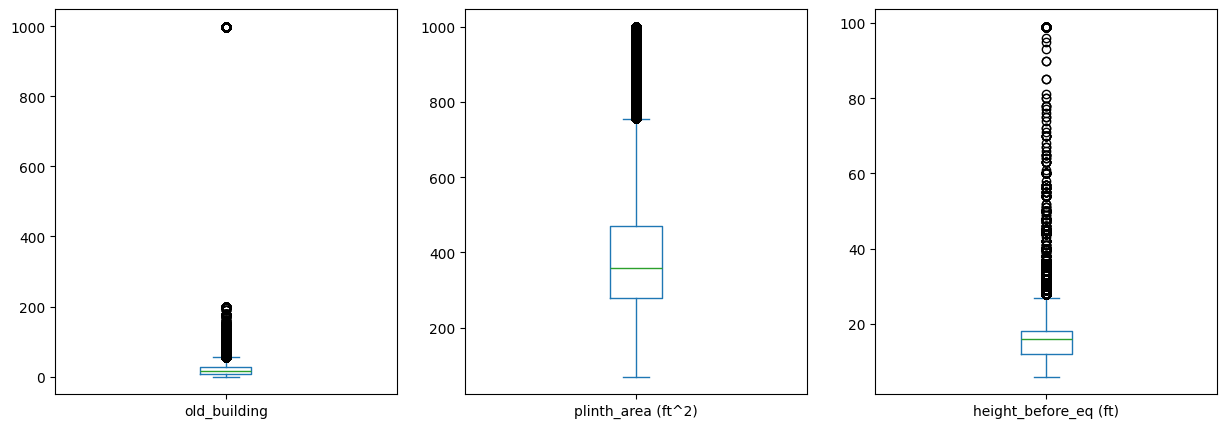

In [ ]:
# Boxplot untuk variabel yang num
df4[num].plot(kind='box', subplots=True, layout=(1,3), sharex=False, sharey=False, figsize=(15,5))

nampak outlier di variabel old building

In [ ]:
# prompt: drop outlier

def remove_outliers(df, columns):
  for col in columns:
    # Calculate the interquartile range (IQR)
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1

    # Define the lower and upper bounds
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Identify and remove outliers
    outlier_indices = df[((df[col] < lower_bound) | (df[col] > upper_bound))].index
    df.drop(outlier_indices, inplace=True)

  return df

In [ ]:
print(df4.shape)

(310009, 25)


In [ ]:
df_copy = df4.copy()

# Specify the columns to remove outliers from
columns_to_remove_outliers = ['old_building', 'plinth_area (ft^2)', 'height_before_eq (ft)']

# Remove outliers from the specified columns
df_without_outliers = remove_outliers(df_copy, columns_to_remove_outliers)

# Check the shape of the new DataFrame
print(df_without_outliers.shape)

(278130, 25)


In [ ]:
df4

,ID,floors_before_eq (total),old_building,plinth_area (ft^2),height_before_eq (ft),land_surface_condition,type_of_foundation,type_of_roof,type_of_ground_floor,type_of_other_floor,...,type_of_reinforcement_concrete,residential_type,no_family_residing,public_place_type,industrial_use_type,govermental_use_type,flexible_superstructure,wall_binding,wall_material,damage_grade
0,5054,3.0,26.0,300.0,16.0,Flat,Clay mortar-Stone/Brick,Wood Light Roof or Bamboo Heavy Roof,Clay,NaN,...,0.0,Non-residential,1.0,Non-public,Non-industrial,Non-govermental,unavailable,5.0,2.0,5
1,166563,2.0,16.0,263.0,18.0,Moderate slope,Mud mortar-Stone/Brick,Bamboo/Timber Light Roof,Mud,NaN,...,0.0,Non-residential,1.0,Non-public,Non-industrial,Non-govermental,unavailable,5.0,2.0,5
2,25330,2.0,5.0,NaN,10.0,Flat,Clay mortar-Stone/Brick,NaN,Mud,Timber-Planck,...,0.0,Non-residential,1.0,Non-public,Non-industrial,Non-govermental,unavailable,5.0,2.0,2
3,60282,NaN,27.0,NaN,NaN,Flat,Clay mortar-Stone/Brick,NaN,NaN,NaN,...,0.0,Hotel/Motel,1.0,Non-public,Non-industrial,Non-govermental,unavailable,5.0,2.0,5
4,194414,1.0,6.0,380.0,6.0,Moderate slope,Clay mortar-Stone/Brick,Bamboo/Timber Light Roof,Clay,Not applicable,...,0.0,Non-residential,1.0,Non-public,Non-industrial,Non-govermental,unavailable,5.0,2.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310004,253891,2.0,6.0,192.0,14.0,Flat,Clay mortar-Stone/Brick,Bamboo/Timber Heavy Roof,Clay,Reinforced cement concrete/rcc/rbc,...,0.0,Hotel/Motel,NaN,Non-public,Non-industrial,Non-govermental,unavailable,5.0,2.0,4
310005,4279,2.0,50.0,310.0,22.0,Flat,Clay mortar-Stone/Brick,Wood Light Roof or Bamboo Heavy Roof,Clay,NaN,...,0.0,Non-residential,1.0,Non-public,Non-industrial,Non-govermental,unavailable,5.0,2.0,5
310006,352159,3.0,22.0,528.0,18.0,Flat,Clay mortar-Stone/Brick,Wood Light Roof or Bamboo Light Roof,Mud,NaN,...,0.0,Non-residential,1.0,Non-public,Non-industrial,Non-govermental,unavailable,5.0,2.0,5
310007,257848,2.0,25.0,520.0,16.0,Flat,Clay mortar-Stone/Brick,Bamboo/Timber Light Roof,Clay,NaN,...,0.0,Hotel/Motel,NaN,Non-public,Non-industrial,Non-govermental,unavailable,5.0,2.0,5


## Outlier tidak dihapus, tetapi dinyatakan sebagai missing value

In [ ]:
df4['old_building'] = df4['old_building'].apply(lambda x: np.nan if x > 900 else x)

# Pre-Processing II : Imputasi Missing Value

In [ ]:
# Fungsi missing check
# Fungsi ini digunakan untuk mengecek jumlah missing value, keunikan tiap kolom
def missing_check(df) :
    wadah = []
    for i in df.columns :
        wadah.append(df[i].unique())
    missing = df.isnull().sum()
    per_miss = missing/len(df)
    data_type = df.dtypes
    number_unique = df.nunique()
    return pd.DataFrame({"Missing":missing,
                        "Percent_Missing":per_miss,
                        "Data_Types":data_type,
                        "Number_of_unique":number_unique,
                        "Unique":wadah}).style.format({'Percent_Missing': "{:.2%}"})

In [ ]:
missing_check(df4)

In [ ]:
df4.columns, df3.columns

(Index(['ID', 'floors_before_eq (total)', 'old_building', 'plinth_area (ft^2)',
        'height_before_eq (ft)', 'land_surface_condition', 'type_of_foundation',
        'type_of_roof', 'type_of_ground_floor', 'type_of_other_floor',
        'position', 'building_plan_configuration',
        'technical_solution_proposed', 'legal_ownership_status',
        'has_secondary_use', 'type_of_reinforcement_concrete',
        'residential_type', 'no_family_residing', 'public_place_type',
        'industrial_use_type', 'govermental_use_type',
        'flexible_superstructure', 'wall_binding', 'wall_material',
        'damage_grade'],
       dtype='object'),
 Index(['ID', 'floors_before_eq (total)', 'old_building', 'plinth_area (ft^2)',
        'height_before_eq (ft)', 'land_surface_condition', 'type_of_foundation',
        'type_of_roof', 'type_of_ground_floor', 'type_of_other_floor',
        'position', 'building_plan_configuration',
        'technical_solution_proposed', 'legal_ownership_status'

In [ ]:
df4['public_place_type'].unique()

array(['Non-public', 'Shopping Sites', 'Other Institutional Building',
       'Hospital', 'Middle School', 'Drugstore', 'Primary School',
       'Religious Sites', 'Museum', 'Recreational Park', 'High School',
       'Health Clinics', 'University'], dtype=object)

In [ ]:
df4['floors_before_eq (total)'].fillna(1, inplace=True)
# leakage nanti df4['old_building'].fillna(df['old_building'].median(), inplace=True) #??????????
# leakage nanti  df4['plinth_area (ft^2)'].fillna(df4['plinth_area (ft^2)'].median(), inplace=True) #??????????
# leakage nanti  df4['height_before_eq (ft)'].fillna(df4['height_before_eq (ft)'].median(), inplace=True) #??????????
df4['land_surface_condition'].fillna('Others', inplace=True)
df4['type_of_foundation'].fillna('Others', inplace=True)
df4['type_of_roof'].fillna('Others', inplace=True)
df4['type_of_ground_floor'].fillna('Other', inplace=True)
df4['type_of_other_floor'].fillna('Not applicable', inplace=True)
df4['position'].fillna('Not attached', inplace=True)
df4['building_plan_configuration'].fillna('Others', inplace=True)
df4['technical_solution_proposed'].fillna('No need', inplace=True)
df4['legal_ownership_status'].fillna('Unknown', inplace=True)
df4['has_secondary_use'].fillna(0, inplace=True)
df4['type_of_reinforcement_concrete'].fillna(0, inplace=True)
df4['residential_type'].fillna('Non-residential', inplace=True)
df4['no_family_residing'].fillna(1, inplace=True)
# df4['public_place_type'] gk ada yang missing
df4['industrial_use_type'].fillna('Non-industrial', inplace=True)
df4['govermental_use_type'].fillna('Non-govermental', inplace=True)
df4['flexible_superstructure'].fillna('unavailable', inplace=True)
df4['wall_binding'].fillna(0, inplace=True)
df4['wall_material'].fillna(0, inplace=True)

C:\Users\Dzulfahmi DA\AppData\Local\Temp\ipykernel_9632\522180605.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df4['floors_before_eq (total)'].fillna(1, inplace=True)
C:\Users\Dzulfahmi DA\AppData\Local\Temp\ipykernel_9632\522180605.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as

In [ ]:
# Imputasi missing juga dilakukan pada data test df3
df3['floors_before_eq (total)'].fillna(1, inplace=True)
# leakage nanti df3['old_building'].fillna(df['old_building'].median(), inplace=True) #??????????
# leakage nanti  df3['plinth_area (ft^2)'].fillna(df3['plinth_area (ft^2)'].median(), inplace=True) #??????????
# leakage nanti  df3['height_before_eq (ft)'].fillna(df3['height_before_eq (ft)'].median(), inplace=True) #??????????
df3['land_surface_condition'].fillna('Others', inplace=True)
df3['type_of_foundation'].fillna('Others', inplace=True)
df3['type_of_roof'].fillna('Others', inplace=True)
df3['type_of_ground_floor'].fillna('Other', inplace=True)
df3['type_of_other_floor'].fillna('Not applicable', inplace=True)
df3['position'].fillna('Not attached', inplace=True)
df3['building_plan_configuration'].fillna('Others', inplace=True)
df3['technical_solution_proposed'].fillna('No need', inplace=True)
df3['legal_ownership_status'].fillna('Unknown', inplace=True)
df3['has_secondary_use'].fillna(0, inplace=True)
df3['type_of_reinforcement_concrete'].fillna(0, inplace=True)
df3['residential_type'].fillna('Non-residential', inplace=True)
df3['no_family_residing'].fillna(1, inplace=True)
# df3['public_place_type'] gk ada yang missing
df3['industrial_use_type'].fillna('Non-industrial', inplace=True)
df3['govermental_use_type'].fillna('Non-govermental', inplace=True)
df3['flexible_superstructure'].fillna('unavailable', inplace=True)
df3['wall_binding'].fillna(0, inplace=True)
df3['wall_material'].fillna(0, inplace=True)

C:\Users\Dzulfahmi DA\AppData\Local\Temp\ipykernel_9632\1802056206.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df3['floors_before_eq (total)'].fillna(1, inplace=True)
C:\Users\Dzulfahmi DA\AppData\Local\Temp\ipykernel_9632\1802056206.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves 

In [ ]:
df4.isnull().sum()

ID                                    0
floors_before_eq (total)              0
old_building                       4174
plinth_area (ft^2)                69032
height_before_eq (ft)             27786
land_surface_condition                0
type_of_foundation                    0
type_of_roof                          0
type_of_ground_floor                  0
type_of_other_floor                   0
position                              0
building_plan_configuration           0
technical_solution_proposed           0
legal_ownership_status                0
has_secondary_use                     0
type_of_reinforcement_concrete        0
residential_type                      0
no_family_residing                    0
public_place_type                     0
industrial_use_type                   0
govermental_use_type                  0
flexible_superstructure               0
wall_binding                          0
wall_material                         0
damage_grade                          0


In [ ]:
# Cek missing values pada df3 dan df4
df3.isnull().sum()

ID                                    0
floors_before_eq (total)              0
old_building                        656
plinth_area (ft^2)                16945
height_before_eq (ft)              6758
land_surface_condition                0
type_of_foundation                    0
type_of_roof                          0
type_of_ground_floor                  0
type_of_other_floor                   0
position                              0
building_plan_configuration           0
technical_solution_proposed           0
legal_ownership_status                0
has_secondary_use                     0
type_of_reinforcement_concrete        0
residential_type                      0
no_family_residing                    0
public_place_type                     0
industrial_use_type                   0
govermental_use_type                  0
flexible_superstructure               0
wall_binding                          0
wall_material                         0
dtype: int64

### Kategori dengan label manual


In [ ]:
land_surface_condition = {
    'Flat': 1,
    'Moderate slope': 2,
    'Others': 0,
    'Steep slope': 3
}

type_of_foundation = {
    'Clay mortar-Stone/Brick': 1,
    'Mud mortar-Stone/Brick': 2,
    'Reinforced Concrete': 4,
    'Cement-Stone/Brick': 3,
    'Bamboo/Timber': 5,
    'Others': 0
}

type_of_roof = {
    'Wood Light Roof or Bamboo Heavy Roof': 1,
    'Bamboo/Timber Light Roof': 2,
    'Others': 0,
    'Wood Light Roof or Bamboo Light Roof': 3,
    'Bamboo/Timber Heavy Roof': 4,
    'Reinforced Cement Concrete/RCC/RBC': 5,
    'Reinforced Brick Slab/rcc/rbc': 6,
    'Reinforced C Concrete/RB/RBC': 7,
    'Reinforced Brick Concrete/RCC/RBC': 8
}

type_of_ground_floor = {
    'Clay': 1,
    'Mud': 2,
    'Other': 0,
    'soil, water, loam Mixed': 3,
    'Brick or Stone': 4,
    'RC': 5,
    'Lumber': 6,
    'Timber': 7,
    'Wood': 8
}

type_of_other_floor = {
    'Not applicable': 0,
    'Timber-Planck': 1,
    'Lumber-plank': 2,
    'Wood or Bamboo Mud': 3,
    'Reinforced cement concrete/rcc/rbc': 4,
    'Wood-Plank': 5,
    'Timber or Bamboo Mud': 6,
    'Reinforced brick concrete/rcc/rbc': 7
}

position = {
    'Not attached': 0,
    'Attached-1 side': 1,
    'Attached-2 side': 2,
    'Attached-3 side': 3
}

building_plan_configuration = {
    'Rectangular': 1,
    'Others': 0,
    'L-shape': 2,
    'Square': 3,
    'Multi-projected': 4,
    'T-shape': 5,
    'U-shape': 6,
    'E-shape': 7,
    'H-shape': 8,
    'Building with Central Courtyard': 9
}

technical_solution_proposed = {
    'No need': 0,
    'Reconstruction': 3,
    'Major repair': 2,
    'Minor repair': 1
}

legal_ownership_status = {
    'Private': 1,
    'Institutional': 3,
    'Unknown': 0,
    'Public': 2
}

residential_type = {
    'Non-residential': 1,
    'Hotel/Motel': 2,
    'Rental Residential': 3,
    'Housing': 4,
    'Others': 0
}

public_place_type = {
    'Non-public': 0,
    'Shopping Sites': 1,
    'Hospital': 2,
    'Middle School': 3,
    'Drugstore': 4,
    'Religious Sites': 5,
    'Primary School': 6,
    'High School': 7,
    'Health Clinics': 8,
    'Other Institutional Building': 9,
    'University': 10,
    'Museum': 11,
    'Recreational Park': 12
}

industrial_use_type = {
    'Non-industrial': 0,
    'Service/Tourism': 1,
    'Food': 2,
    'Infrastructure': 3,
    'Metallurgy': 4,
    'Manufacturing': 5,
    'Farm': 6,
    'Agro': 7,
    'Forest-based': 8
}

govermental_use_type = {
    'Non-govermental': 0,
    'Govermental Buildings': 1,
    'Police Offices': 2
}

flexible_superstructure = {
    'unavailable': 0,
    'available': 1
}

In [ ]:
df4['land_surface_condition'] = df4['land_surface_condition'].map(land_surface_condition)
df4['type_of_foundation'] = df4['type_of_foundation'].map(type_of_foundation)
df4['type_of_roof'] = df4['type_of_roof'].map(type_of_roof)
df4['type_of_ground_floor'] = df4['type_of_ground_floor'].map(type_of_ground_floor)
df4['type_of_other_floor'] = df4['type_of_other_floor'].map(type_of_other_floor)
df4['position'] = df4['position'].map(position)
df4['building_plan_configuration'] = df4['building_plan_configuration'].map(building_plan_configuration)
df4['technical_solution_proposed'] = df4['technical_solution_proposed'].map(technical_solution_proposed)
df4['legal_ownership_status'] = df4['legal_ownership_status'].map(legal_ownership_status)
df4['residential_type'] = df4['residential_type'].map(residential_type)
df4['public_place_type'] = df4['public_place_type'].map(public_place_type)
df4['industrial_use_type'] = df4['industrial_use_type'].map(industrial_use_type)
df4['govermental_use_type'] = df4['govermental_use_type'].map(govermental_use_type)
df4['flexible_superstructure'] = df4['flexible_superstructure'].map(flexible_superstructure)

In [ ]:
df4.isna().sum()

ID                                    0
floors_before_eq (total)              0
old_building                       4174
plinth_area (ft^2)                69032
height_before_eq (ft)             27786
land_surface_condition                0
type_of_foundation                    0
type_of_roof                          0
type_of_ground_floor                  0
type_of_other_floor                   0
position                              0
building_plan_configuration           0
technical_solution_proposed           0
legal_ownership_status                0
has_secondary_use                     0
type_of_reinforcement_concrete        0
residential_type                      0
no_family_residing                    0
public_place_type                     0
industrial_use_type                   0
govermental_use_type                  0
flexible_superstructure               0
wall_binding                          0
wall_material                         0
damage_grade                          0


In [ ]:
df3['land_surface_condition'] = df3['land_surface_condition'].map(land_surface_condition)
df3['type_of_foundation'] = df3['type_of_foundation'].map(type_of_foundation)
df3['type_of_roof'] = df3['type_of_roof'].map(type_of_roof)
df3['type_of_ground_floor'] = df3['type_of_ground_floor'].map(type_of_ground_floor)
df3['type_of_other_floor'] = df3['type_of_other_floor'].map(type_of_other_floor)
df3['position'] = df3['position'].map(position)
df3['building_plan_configuration'] = df3['building_plan_configuration'].map(building_plan_configuration)
df3['technical_solution_proposed'] = df3['technical_solution_proposed'].map(technical_solution_proposed)
df3['legal_ownership_status'] = df3['legal_ownership_status'].map(legal_ownership_status)
df3['residential_type'] = df3['residential_type'].map(residential_type)
df3['public_place_type'] = df3['public_place_type'].map(public_place_type)
df3['industrial_use_type'] = df3['industrial_use_type'].map(industrial_use_type)
df3['govermental_use_type'] = df3['govermental_use_type'].map(govermental_use_type)
df3['flexible_superstructure'] = df3['flexible_superstructure'].map(flexible_superstructure)

In [ ]:
df3

,ID,floors_before_eq (total),old_building,plinth_area (ft^2),height_before_eq (ft),land_surface_condition,type_of_foundation,type_of_roof,type_of_ground_floor,type_of_other_floor,...,has_secondary_use,type_of_reinforcement_concrete,residential_type,no_family_residing,public_place_type,industrial_use_type,govermental_use_type,flexible_superstructure,wall_binding,wall_material
0,71840,3.0,20.0,374.0,21.0,1,1,3,1,0,...,0.0,0.0,1,1.0,0,0,0,0,5.0,2.0
1,85155,2.0,26.0,364.0,16.0,1,1,3,1,0,...,0.0,0.0,1,1.0,0,0,0,0,5.0,2.0
2,287066,1.0,6.0,NaN,NaN,0,1,0,0,0,...,1.0,0.0,1,1.0,0,3,0,0,5.0,2.0
3,124951,2.0,25.0,345.0,12.0,2,1,3,1,5,...,0.0,0.0,1,1.0,0,0,0,0,5.0,2.0
4,73581,3.0,25.0,324.0,14.0,2,1,1,2,2,...,0.0,0.0,1,1.0,0,0,0,0,5.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77498,238185,2.0,17.0,NaN,15.0,2,1,0,1,0,...,0.0,0.0,1,1.0,0,0,0,1,5.0,2.0
77499,290899,1.0,3.0,90.0,7.0,1,1,2,1,0,...,0.0,0.0,1,1.0,0,0,0,0,5.0,2.0
77500,184490,3.0,15.0,395.0,18.0,1,1,2,1,0,...,0.0,0.0,1,1.0,0,0,0,0,5.0,2.0
77501,342028,3.0,4.0,262.0,24.0,1,1,2,1,0,...,0.0,0.0,1,1.0,0,0,0,0,5.0,2.0


# Eksplorasi dan Visualisasi Data

## EDA 1

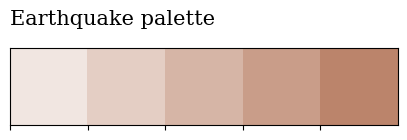

In [ ]:
# Palette
sns.palplot(['#f1e6e1', '#e4cec4', '#d6b5a6','#c99d89', '#bb846b'])

plt.title("Earthquake palette ",loc='left',fontfamily='serif',fontsize=15,y=1.2)
plt.show()

## Target Variable

In [ ]:
num = [ 'old_building', 'plinth_area (ft^2)',
       'height_before_eq (ft)']

## Target Variable

In [ ]:
data = df.damage_grade.value_counts()
data

damage_grade
4    88642
3    60430
2    45541
1    28924
0    24030
Name: count, dtype: int64

In [ ]:
data.index = data.index +1

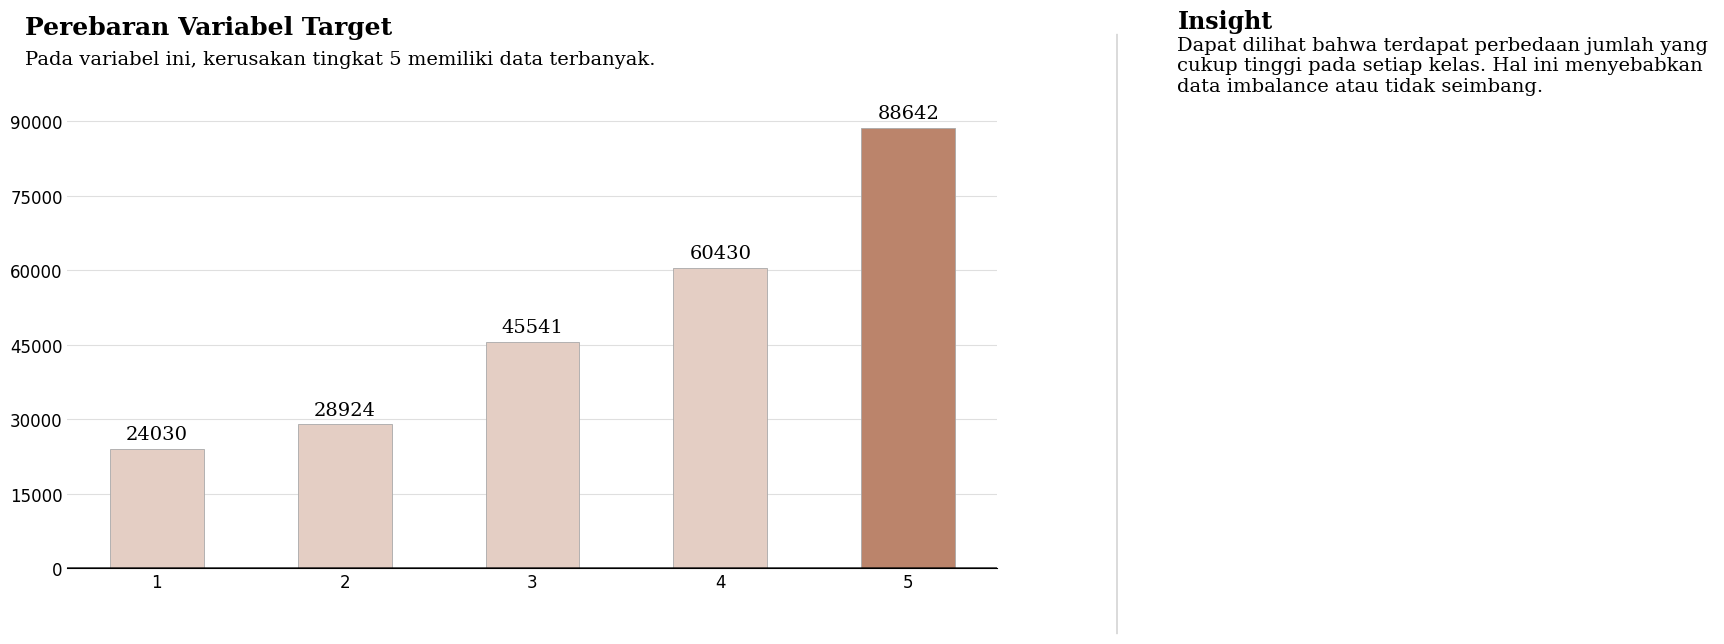

In [ ]:
color_map = ['#e4cec4' for _ in range(5)]
color_map[0] = '#bb846b' # color highlight

fig, ax = plt.subplots(1,1, figsize=(12, 6))
ax.bar(data.index, data, width=0.5,
       edgecolor='darkgray',
       linewidth=0.6,color=color_map)

#annotations
for i in data.index:
    ax.annotate(f"{data[i]}",
                   xy=(i, data[i] + 3000), #i like to change this to roughly 5% of the highest cat
                   va = 'center', ha='center',fontweight='light', fontfamily='serif', size = 14)


ax.set_xticks(data.index)
# Remove border from plot

for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)

# Tick labels

#ax.set_xticklabels(5-data.index, fontfamily='serif', rotation=0)

# Title and sub-title

fig.text(0.09, 1, 'Perebaran Variabel Target', fontsize=18, fontweight='bold', fontfamily='serif')
fig.text(0.09, 0.95, 'Pada variabel ini, kerusakan tingkat 5 memiliki data terbanyak.', fontsize=14, fontweight='light', fontfamily='serif')

fig.text(1.05, 1.01, 'Insight', fontsize=17, fontweight='bold', fontfamily='serif')

fig.text(1.05, 0.87, '''
Dapat dilihat bahwa terdapat perbedaan jumlah yang
cukup tinggi pada setiap kelas. Hal ini menyebabkan
data imbalance atau tidak seimbang.
'''
         , fontsize=14, fontweight='light', fontfamily='serif')

ax.grid(axis='y', linestyle='-', alpha=0.4)

grid_y_ticks = np.arange(0, 95000, 15000) # y ticks, min, max, then step
ax.set_yticks(grid_y_ticks)
ax.set_axisbelow(True)

#Axis labels

#plt.xlabel("Country", fontsize=12, fontweight='light', fontfamily='serif',loc='left',y=-1.5)
#plt.ylabel("Count", fontsize=12, fontweight='light', fontfamily='serif')
 #plt.legend(loc='upper right')

# thicken the bottom line if you want to
plt.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)

ax.tick_params(axis='both', which='major', labelsize=12)


import matplotlib.lines as lines
l1 = lines.Line2D([1, 1], [0, 1], transform=fig.transFigure, figure=fig,color='black',lw=0.2)
fig.lines.extend([l1])

ax.tick_params(axis=u'both', which=u'both',length=0)

plt.show()

<Axes: >

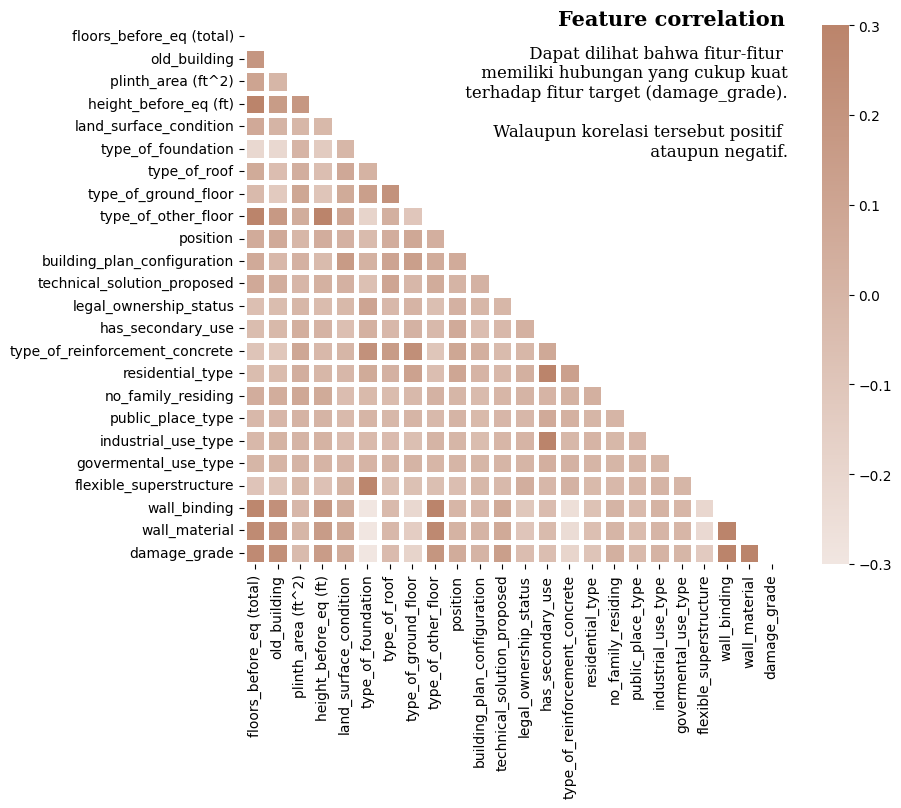

In [ ]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ['#f1e6e1', '#e4cec4', '#d6b5a6','#c99d89', '#bb846b'])

fig, ax = plt.subplots(figsize=(10, 7))
fig.text(.52,.88,'Feature correlation', fontfamily='serif',fontweight='bold',fontsize=15)
fig.text(.75,.665,
            '''
             Dapat dilihat bahwa fitur-fitur
             memiliki hubungan yang cukup kuat
             terhadap fitur target (damage_grade).

             Walaupun korelasi tersebut positif
             ataupun negatif.
             ''', fontfamily='serif',fontsize=12,ha='right')
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, vmin=-.3, center=0, square=True, linewidths=2.5)

## Numerical Data

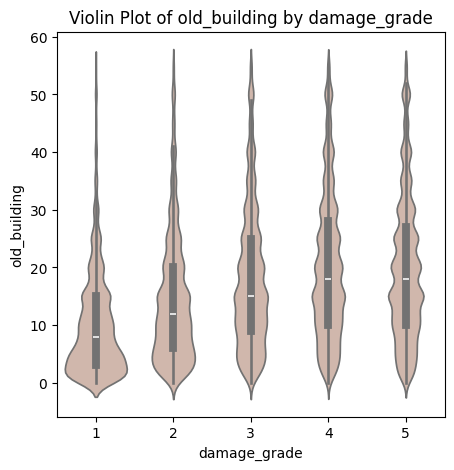

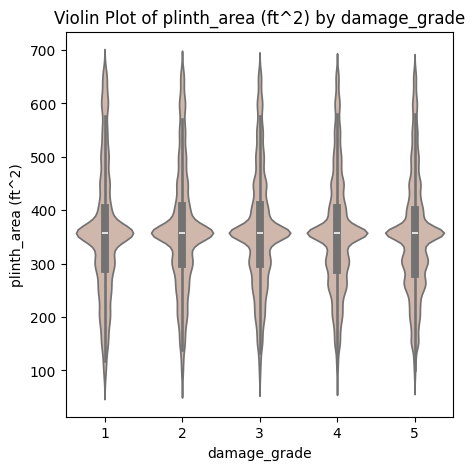

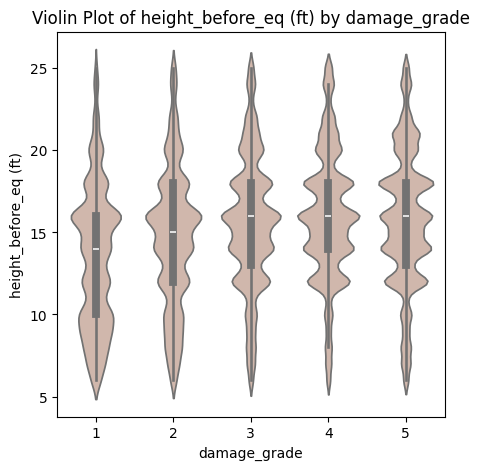

In [ ]:
# prompt: scatter plot num hue by damage_grade

for i in num:
  fig, ax = plt.subplots(1, 1, figsize=(5, 5))
  sns.violinplot(data=df[num + ['damage_grade']], x='damage_grade', y=i, color = '#d6b5a6')
  plt.title(f'Violin Plot of {i} by damage_grade')
  plt.show()


## Categorical Data

In [ ]:
df['damage_grade'] = df['damage_grade']+1

In [ ]:
# prompt: get df with columns that are not in num list

cat = [col for col in df.columns if col not in num]
df_cat = df[cat]


In [ ]:
cat

['floors_before_eq (total)',
 'land_surface_condition',
 'type_of_foundation',
 'type_of_roof',
 'type_of_ground_floor',
 'type_of_other_floor',
 'position',
 'building_plan_configuration',
 'technical_solution_proposed',
 'legal_ownership_status',
 'has_secondary_use',
 'type_of_reinforcement_concrete',
 'residential_type',
 'no_family_residing',
 'public_place_type',
 'industrial_use_type',
 'govermental_use_type',
 'flexible_superstructure',
 'wall_binding',
 'wall_material',
 'damage_grade']

In [ ]:
data = df_cat.groupby('damage_grade')[['damage_grade', 'wall_binding']].size().reset_index()
data = data['damage_grade']
df_heatmap = df_cat.loc[df_cat['damage_grade'].isin(data)]
df_heatmap = pd.crosstab(df_heatmap['damage_grade'],df_heatmap['wall_binding'],normalize = "index").T

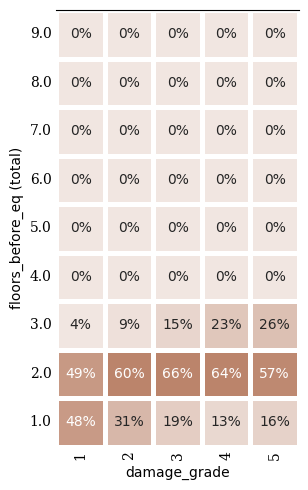

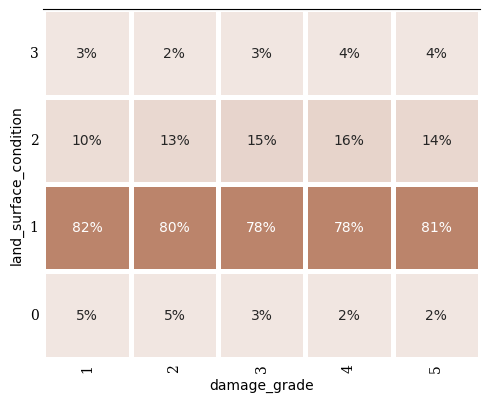

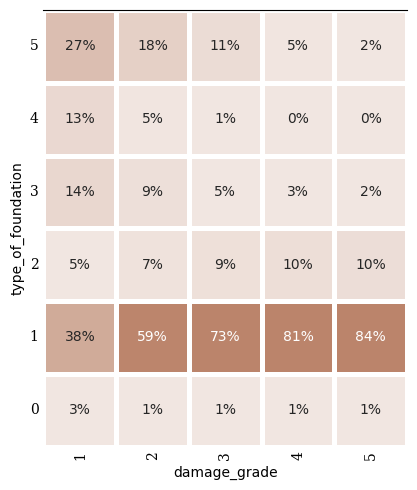

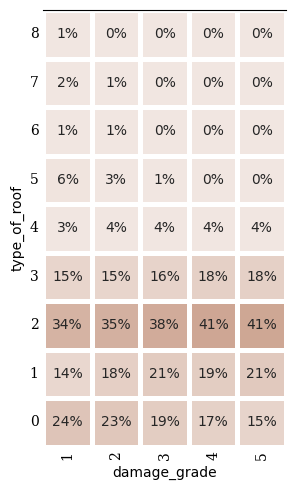

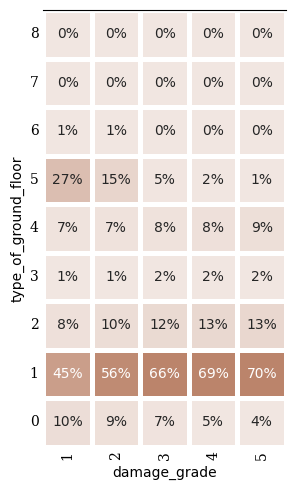

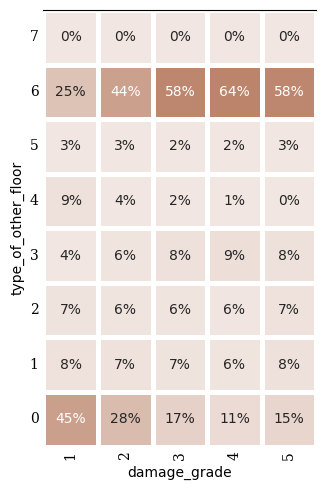

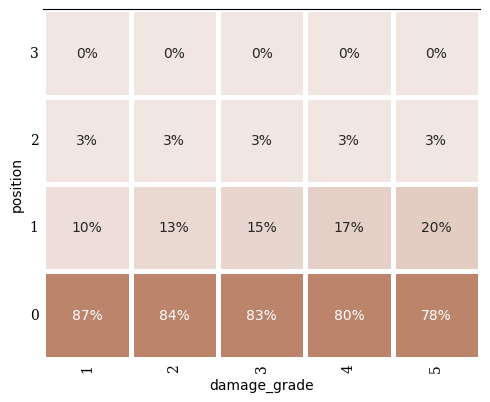

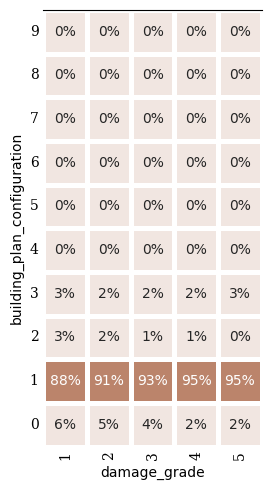

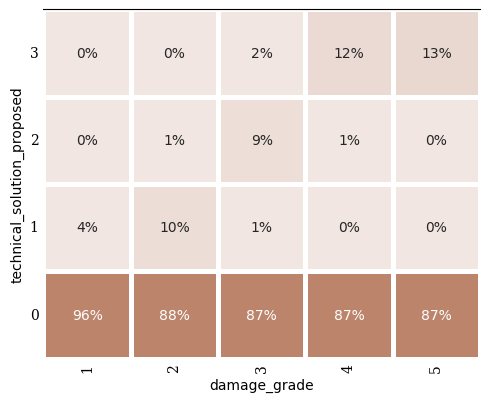

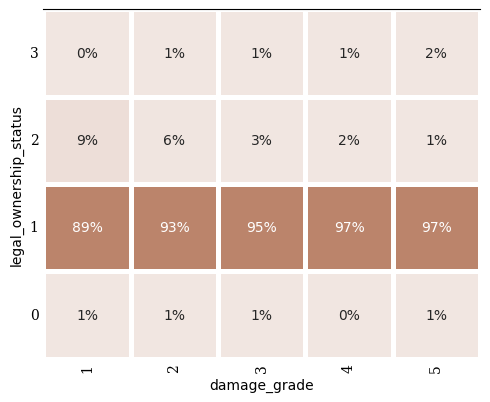

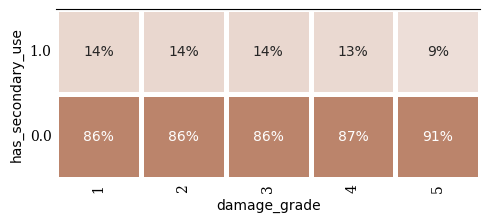

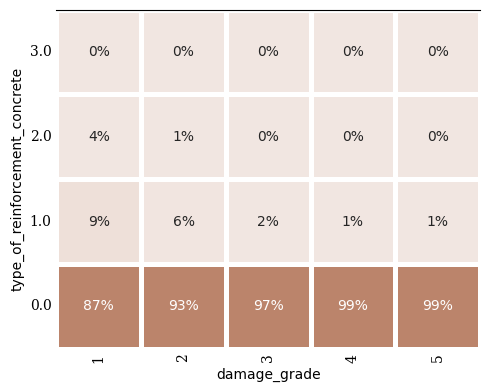

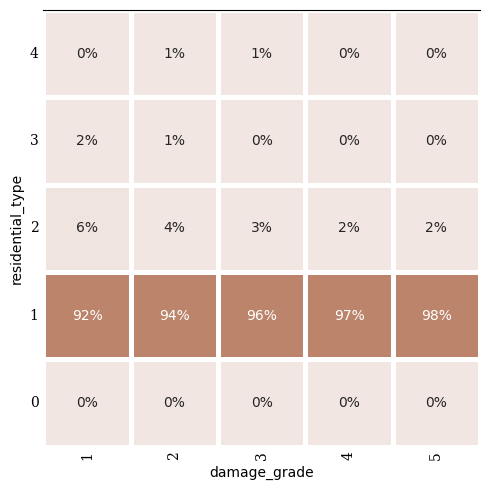

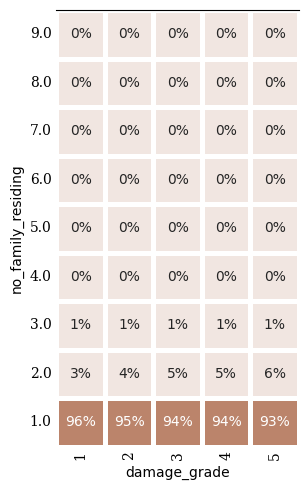

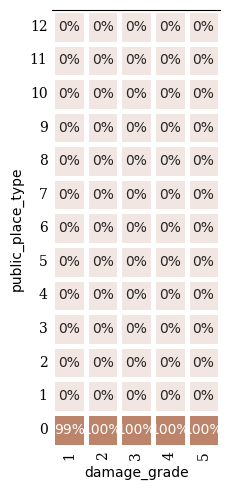

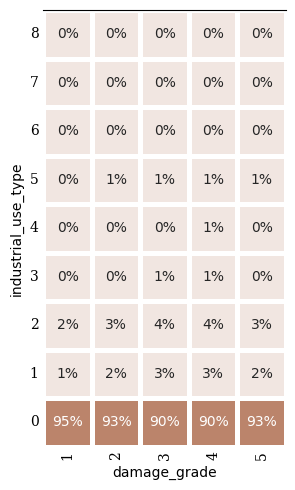

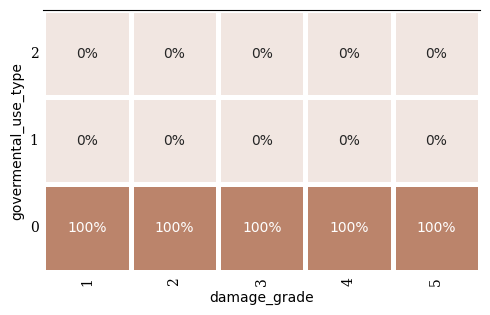

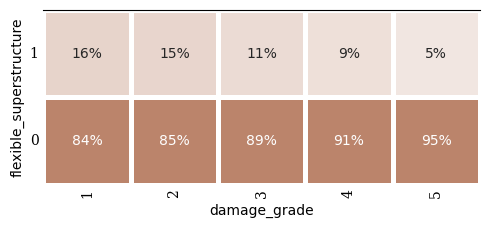

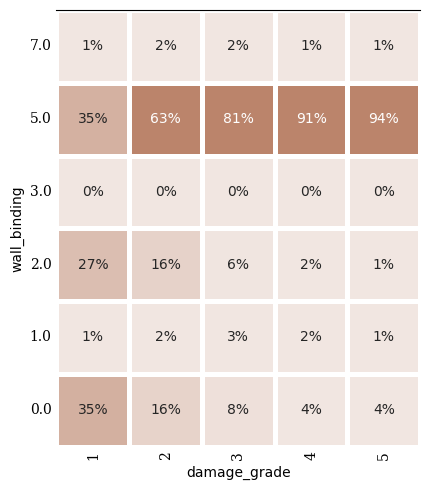

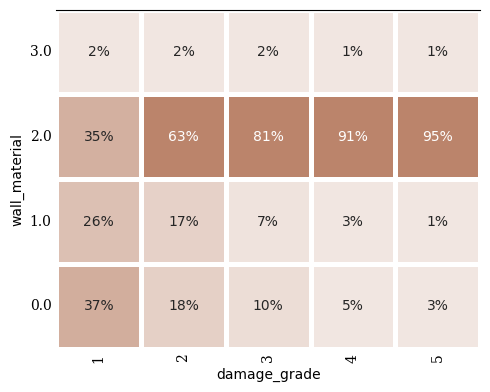

In [ ]:
for i in cat:
  data = df_cat.groupby('damage_grade')[['damage_grade', i]].size().reset_index()
  data = data['damage_grade']
  df_heatmap = df_cat.loc[df_cat['damage_grade'].isin(data)]
  df_heatmap = pd.crosstab(df_heatmap['damage_grade'],df_heatmap[i],normalize = "index").T

  fig, ax = plt.subplots(1, 1, figsize=(5, 5))

  country_order2 = [1,2,3,4,5]

  age_order = sorted(list(df[i].unique()), reverse=True)

  sns.heatmap(df_heatmap.loc[age_order,country_order2],cmap=cmap,square=True, linewidth=2.5,cbar=False,
            annot=True,fmt='1.0%',vmax=.6,vmin=0.05,ax=ax,annot_kws={"fontsize":10})

  ax.spines['top'].set_visible(True)


  #fig.text(.99, .725, 'Target ages proportion of total content by country', fontweight='bold', fontfamily='serif', fontsize=15,ha='right')
  #fig.text(0.99, 0.7, 'Here we see interesting differences between countries. Most shows in India are targeted to teens, for instance.',ha='right', fontsize=12,fontfamily='serif')

  ax.set_yticklabels(ax.get_yticklabels(), fontfamily='serif', rotation = 0, fontsize=10)
  ax.set_xticklabels(ax.get_xticklabels(), fontfamily='serif', rotation=90, fontsize=10)

  ax.set_ylabel(i)
  ax.set_xlabel('damage_grade')
  ax.tick_params(axis=u'both', which=u'both',length=0)
  plt.tight_layout()
  plt.show()

# Modelling

In [ ]:
df3 = df3.drop('ID', axis=1)

In [ ]:
X = df4.drop(['damage_grade','ID'], axis=1)
y = df4['damage_grade']

In [ ]:
# import module train_test_split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 2024)

In [ ]:
# count unique values in target
y_train.value_counts()

damage_grade
5    87728
4    59476
3    45028
2    29157
1    26618
Name: count, dtype: int64

In [ ]:
# Cek missing di X_train, X_test, y_train, y_test
X_train.isna().sum().sum(), X_test.isna().sum().sum(), y_train.isna().sum(), y_test.isna().sum()

(80991, 20001, 0, 0)

## Imputasi Missing value

In [ ]:
X_train['old_building'].fillna(X_train['old_building'].median(), inplace=True) #??????????
X_train['plinth_area (ft^2)'].fillna(X_train['plinth_area (ft^2)'].median(), inplace=True) #??????????
X_train['height_before_eq (ft)'].fillna(X_train['height_before_eq (ft)'].median(), inplace=True) #??????????

X_test['old_building'].fillna(X_train['old_building'].median(), inplace=True) #??????????
X_test['plinth_area (ft^2)'].fillna(X_train['plinth_area (ft^2)'].median(), inplace=True) #??????????
X_test['height_before_eq (ft)'].fillna(X_train['height_before_eq (ft)'].median(), inplace=True) #??????????

C:\Users\Dzulfahmi DA\AppData\Local\Temp\ipykernel_9632\3353842441.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train['old_building'].fillna(X_train['old_building'].median(), inplace=True) #??????????
C:\Users\Dzulfahmi DA\AppData\Local\Temp\ipykernel_9632\3353842441.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we

In [ ]:
# Cek missing di X_train, X_test, y_train, y_test
X_train.isna().sum().sum(), X_test.isna().sum().sum(), y_train.isna().sum(), y_test.isna().sum()

(0, 0, 0, 0)

In [ ]:
list_model = {
    'GradientBoostingClassifier':GradientBoostingClassifier(random_state=2024),
    'HistGradientBoostingClassifier':HistGradientBoostingClassifier(random_state=2024),
    'CatBoostClassifier':CatBoostClassifier(random_state=2024, silent=True),
    'LGBM':LGBMClassifier(random_state=2024),
    'DTClassifier':DecisionTreeClassifier(random_state=2024),
    'DecisionTreeClassifier': DecisionTreeClassifier(random_state=2024),
    'LogisticRegression': LogisticRegression(random_state=2024),
    'KNeighborsClassifier': KNeighborsClassifier(),
}

In [ ]:
result = []
for model in list_model:
    model = list_model[model]
    print(f'Model : {type(model).__name__}')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Hitung nilai berdasarkan model yang sudah di train / fit dan hasil prediksinya
    accuracy = accuracy_score(y_test, y_pred)
    # Calculate precision, recall, F1-score and support for each class
    precision, recall, f1, support = precision_recall_fscore_support(y_test, y_pred, average='macro')


    # Kumpulkan nilai-nilai di atas menjadi satu
    hasil = {
        'Model' : type(model).__name__,
        'Accuracy' : accuracy,
        'F1 Score' : f1,
        'Precision' : precision,
        'Recall' : recall
    }

    print('Done')

    # Simpan nilai model ini dalam list result
    result.append(hasil)

# Ubah menjadi dataframe
result_all = pd.DataFrame(result)
print(result_all.sort_values('F1 Score', ascending=False))

Model : GradientBoostingClassifier
Done
Model : HistGradientBoostingClassifier
Done
Model : CatBoostClassifier
Done
Model : LGBMClassifier
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.017332 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 567
[LightGBM] [Info] Number of data points in the train set: 248007, number of used features: 23
[LightGBM] [Info] Start training from score -2.231869
[LightGBM] [Info] Start training from score -2.140762
[LightGBM] [Info] Start training from score -1.706172
[LightGBM] [Info] Start training from score -1.427884
[LightGBM] [Info] Start training from score -1.039216
Done
Model : DecisionTreeClassifier
Done
Model : DecisionTreeClassifier
Done
Model : LogisticRegression


c:\Users\Dzulfahmi DA\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Done
Model : KNeighborsClassifier
Done
                            Model  Accuracy  F1 Score  Precision    Recall
2              CatBoostClassifier  0.470678  0.386886   0.462490  0.404662
1  HistGradientBoostingClassifier  0.467566  0.377174   0.459960  0.399354
3                  LGBMClassifier  0.466969  0.375805   0.460807  0.398744
0      GradientBoostingClassifier  0.460598  0.355036   0.463393  0.388547
4          DecisionTreeClassifier  0.359746  0.337413   0.336889  0.337971
5          DecisionTreeClassifier  0.359746  0.337413   0.336889  0.337971
7            KNeighborsClassifier  0.342892  0.316523   0.313413  0.322698
6              LogisticRegression  0.407842  0.248949   0.321723  0.320471


## Model dengan Pembobotan

In [ ]:
# Distribusi Kelas
class_counts = y_train.value_counts()
# Total jumlah sampel
total_samples = len(y_train)

# Bobot proporsional
class_weights_prop = {cls: total_samples / count for cls, count in class_counts.items()}

print("Class Weights (Proportional):", class_weights_prop)

Class Weights (Proportional): {5: 2.826999361663323, 4: 4.1698668370435135, 3: 5.507839566491961, 2: 8.50591624652742, 1: 9.317266511383275}


In [ ]:
# Ubah dictionary class_weights_prop dengan awalan dari 0 untuk histgradientboosting
class_weights_prop_start0 = {0: 9.317266511383275, 1: 8.50591624652742, 2: 5.507839566491961, 3:4.1698668370435135, 4: 2.826999361663323}

In [ ]:
list_model_weight = {
    'CatBoostClassifier':CatBoostClassifier(random_state=2024, silent=True, class_weights=class_weights_prop),
    'LGBM':LGBMClassifier(random_state=2024, class_weight=class_weights_prop),
    'HistGradientBoostingClassifier':HistGradientBoostingClassifier(random_state=2024, class_weight=class_weights_prop_start0),
}

In [ ]:
result = []

for model_name, model in list_model_weight.items():
    print(f'Model : {model_name}')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Hitung nilai berdasarkan model yang sudah dilatih dan hasil prediksinya
    accuracy = accuracy_score(y_test, y_pred)
    precision, recall, f1, support = precision_recall_fscore_support(y_test, y_pred, average='macro')

    # Kumpulkan nilai-nilai di atas menjadi satu
    hasil = {
        'Model': model_name,
        'Accuracy': accuracy,
        'F1 Score': f1,
        'Precision': precision,
        'Recall': recall
    }

    print('Done')

    # Simpan nilai model ini dalam list result
    result.append(hasil)

# Ubah menjadi dataframe
result_all = pd.DataFrame(result)
print(result_all.sort_values('F1 Score', ascending=False))

Model : CatBoostClassifier
Done
Model : LGBM
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.070587 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 567
[LightGBM] [Info] Number of data points in the train set: 248007, number of used features: 23
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
Done
Model : HistGradientBoostingClassifier
Done
                            Model  Accuracy  F1 Score  Precision    Recall
0              CatBoostClassifier  0.442582  0.413773   0.410065  0.426597
2  HistGradientBoostingClassifier  0.440454  0.408823

# Hyperparameter Tuning : OPTUNA


### Tuning Learning Rate

In [ ]:
import optuna
from optuna.samplers import TPESampler
from sklearn.metrics import f1_score
from catboost import CatBoostClassifier

# Define the objective function
def objective(trial):
    # Suggest values for the hyperparameters
    n_estimators= 372
    learning_rate = trial.suggest_loguniform('learning_rate', 0.01, 0.3)

    # Define the model with suggested hyperparameters
    model = CatBoostClassifier(
        random_state=2024,
        silent=True,
        class_weights=class_weights_prop,
        learning_rate = learning_rate
    )

    # Train the model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Calculate the F1 macro score
    f1_macro = f1_score(y_test, y_pred, average='macro')

    return f1_macro

# Create the Optuna study
study = optuna.create_study(direction='maximize', sampler=TPESampler(seed=2024))
# Optimize the study
study.optimize(objective, n_trials=10)

# Get the best hyperparameters
best_params = study.best_params
print("Best Parameters:", best_params)

# Train the best model with the best parameters
best_model = CatBoostClassifier(
    random_state=2024,
    silent=True,
    class_weights=class_weights_prop,
    **best_params
)
best_model.fit(X_train, y_train)

# Predict on the test set
y_pred = best_model.predict(X_test)
f1_macro = f1_score(y_test, y_pred, average='macro')

print(f"F1 Macro on Test Set: {f1_macro}")


[I 2024-06-30 14:06:46,062] A new study created in memory with name: no-name-68736a96-0ade-417b-b34d-f525e02d0aa9
/tmp/ipykernel_33/761913929.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.01, 0.3)
[I 2024-06-30 14:08:39,810] Trial 0 finished with value: 0.41171973191376277 and parameters: {'learning_rate': 0.07388712087607643}. Best is trial 0 with value: 0.41171973191376277.
/tmp/ipykernel_33/761913929.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.01, 0.3)
[I 2024-06-30 14:10:33,093] Trial 1 finished with value: 0.4147455604937086 and pa

Best Parameters: {'learning_rate': 0.11863746916334313}
F1 Macro on Test Set: 0.41494660327930494


In [ ]:
best_model = CatBoostClassifier(
    random_state=2024,
    silent=True,
    class_weights=class_weights_prop,
    learning_rate=0.11863746916334313
)
best_model.fit(X_train, y_train)

# Predict on the test set
y_pred = best_model.predict(X_test)
f1_macro = f1_score(y_test, y_pred, average='macro')

print(f"F1 Macro on Test Set: {f1_macro}")


F1 Macro on Test Set: 0.41494660327930494


### Classification Report

In [ ]:
from sklearn.metrics import classification_report
# Generate and print the classification report
report = classification_report(y_test, y_pred, target_names=[str(cls) for cls in np.unique(y_train)])
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           1       0.49      0.67      0.56      6655
           2       0.31      0.25      0.28      7289
           3       0.35      0.28      0.31     11257
           4       0.35      0.36      0.36     14869
           5       0.56      0.58      0.57     21932

    accuracy                           0.44     62002
   macro avg       0.41      0.43      0.41     62002
weighted avg       0.43      0.44      0.44     62002



### Confussion Matrix

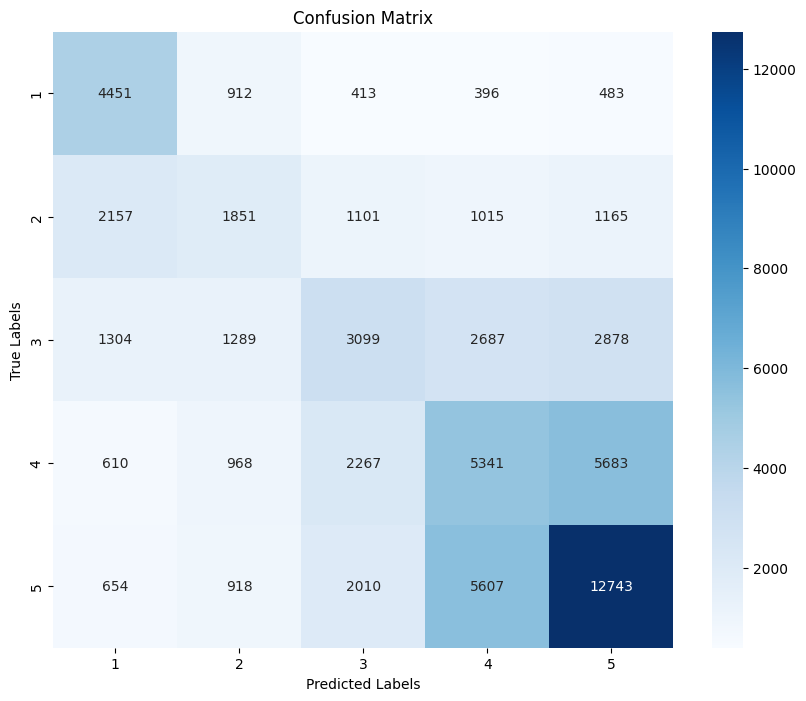

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_train), yticklabels=np.unique(y_train))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Post Analysis

## Feature Importance

Feature Importance (Descending Order):
Feature technical_solution_proposed: 18.2853
Feature wall_binding: 10.0371
Feature wall_material: 9.2850
Feature old_building: 9.1557
Feature height_before_eq (ft): 8.4432
Feature plinth_area (ft^2): 6.9514
Feature type_of_foundation: 5.7729
Feature floors_before_eq (total): 4.9504
Feature type_of_ground_floor: 4.7425
Feature type_of_roof: 4.2103
Feature type_of_other_floor: 2.7293
Feature position: 2.5212
Feature type_of_reinforcement_concrete: 2.4910
Feature land_surface_condition: 2.4619
Feature flexible_superstructure: 2.1529
Feature building_plan_configuration: 1.0988
Feature legal_ownership_status: 1.0910
Feature industrial_use_type: 0.9838
Feature residential_type: 0.8704
Feature has_secondary_use: 0.8407
Feature no_family_residing: 0.8285
Feature public_place_type: 0.0927
Feature govermental_use_type: 0.0039


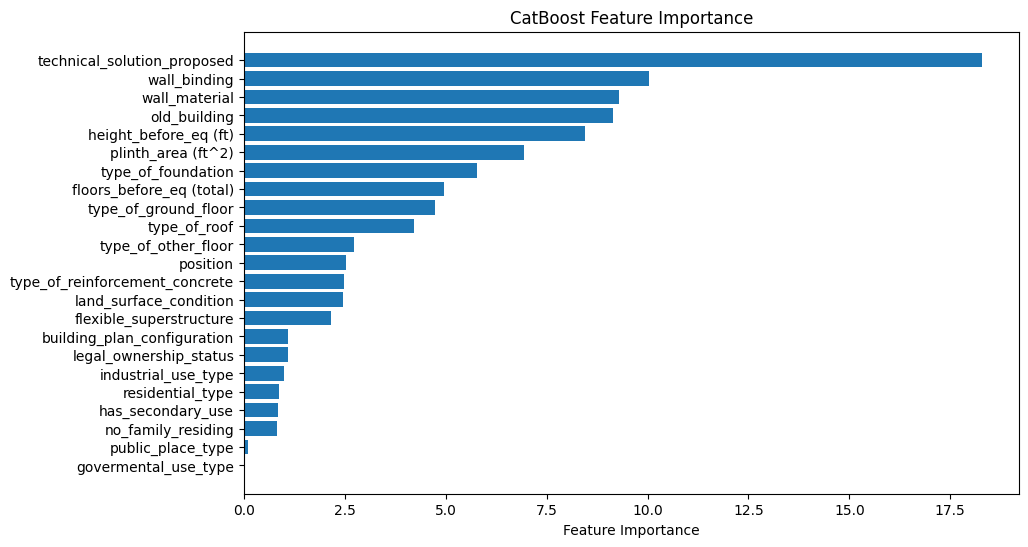

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from catboost import CatBoostClassifier

# Mengakses pentingnya fitur
feature_importance = best_model.get_feature_importance()
feature_names = X_train.columns  # Mengasumsikan X_train adalah DataFrame

# Menggabungkan pentingnya fitur dan nama fitur, lalu mengurutkan berdasarkan pentingnya secara descending
features = list(zip(feature_names, feature_importance))
features_sorted = sorted(features, key=lambda x: x[1], reverse=True)

# Memisahkan nama fitur dan pentingnya fitur yang telah diurutkan
feature_names_sorted, feature_importance_sorted = zip(*features_sorted)

# Mencetak pentingnya fitur
print("Feature Importance (Descending Order):")
for name, importance in features_sorted:
    print(f"Feature {name}: {importance:.4f}")

# Membuat horizontal barchart
plt.figure(figsize=(10, 6))
plt.barh(np.arange(len(feature_importance_sorted)), feature_importance_sorted, align='center')
plt.yticks(np.arange(len(feature_importance_sorted)), feature_names_sorted)
plt.xlabel('Feature Importance')
plt.title('CatBoost Feature Importance')
plt.gca().invert_yaxis()  # Membalikkan urutan fitur agar fitur dengan pentingnya tertinggi di atas
plt.show()


## Shap Values

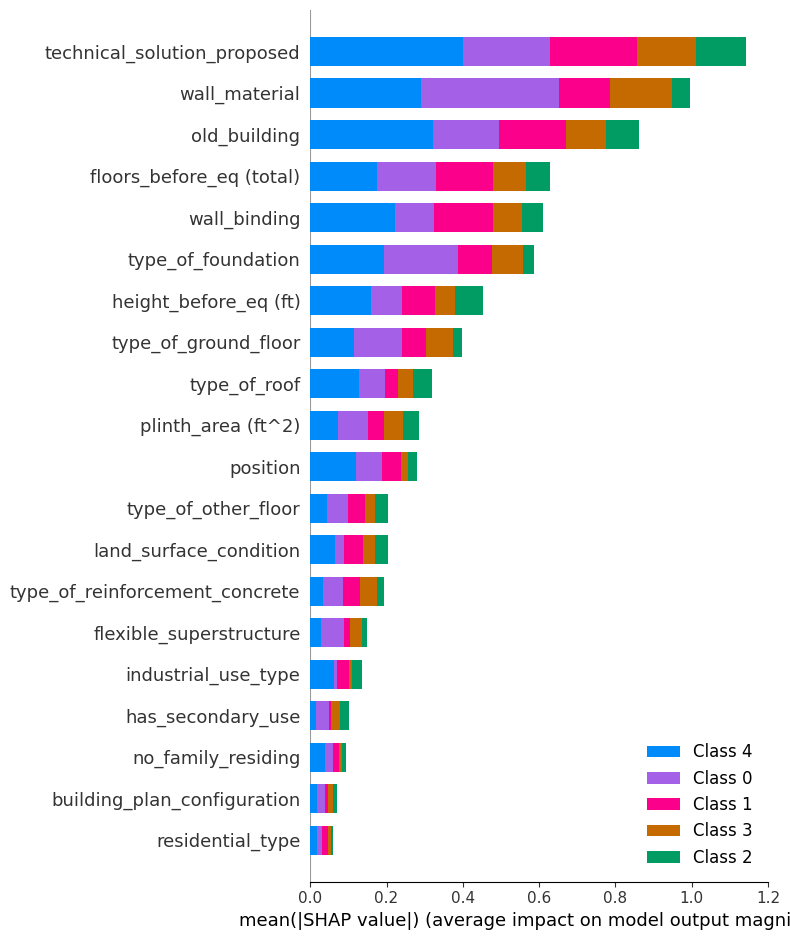

In [ ]:
import shap
import numpy as np
import matplotlib.pyplot as plt
from catboost import CatBoostClassifier

# Menghitung nilai SHAP
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_train)

# Memvisualisasikan nilai SHAP
shap.summary_plot(shap_values, X_train, plot_type="bar", feature_names=X_train.columns)


### Shap Kelas 0

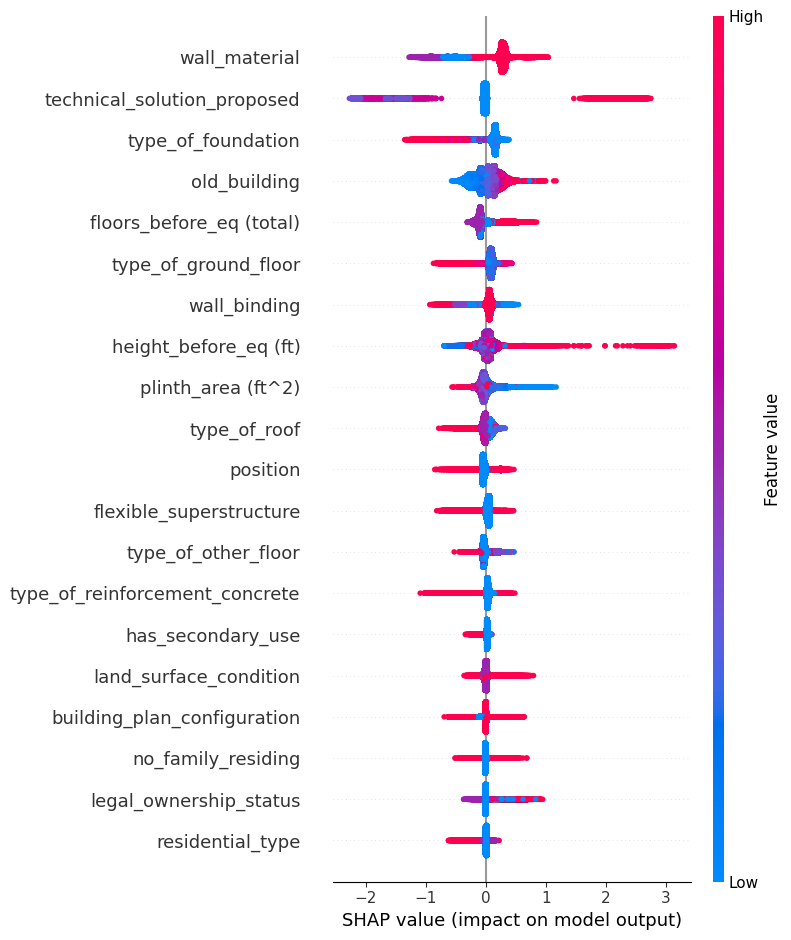

In [ ]:
# Memvisualisasikan nilai SHAP (gunakan class ke-0)
class_index = 0
shap_values_class = shap_values[class_index]

# Plot nilai SHAP untuk setiap fitur
shap.summary_plot(shap_values_class, X_train, feature_names=X_train.columns)

### Shape Values kelas 1

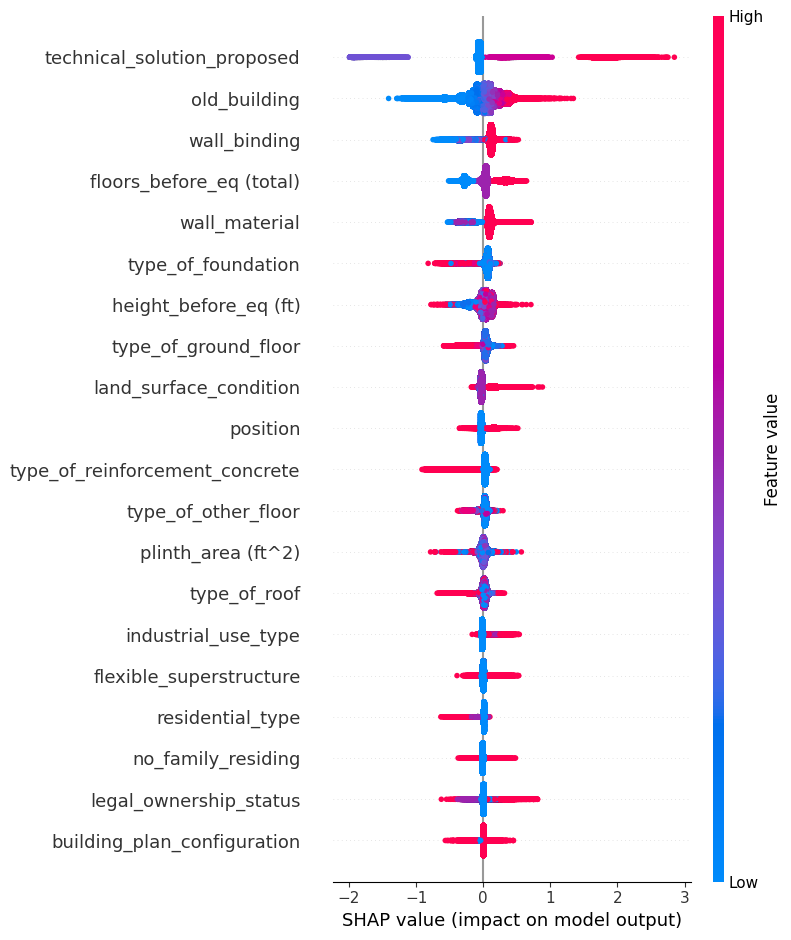

In [ ]:
# Memvisualisasikan nilai SHAP kelas 1
class_index = 1
shap_values_class = shap_values[class_index]

# Plot nilai SHAP untuk setiap fitur
shap.summary_plot(shap_values_class, X_train, feature_names=X_train.columns)

### Shap Values Kelas 2

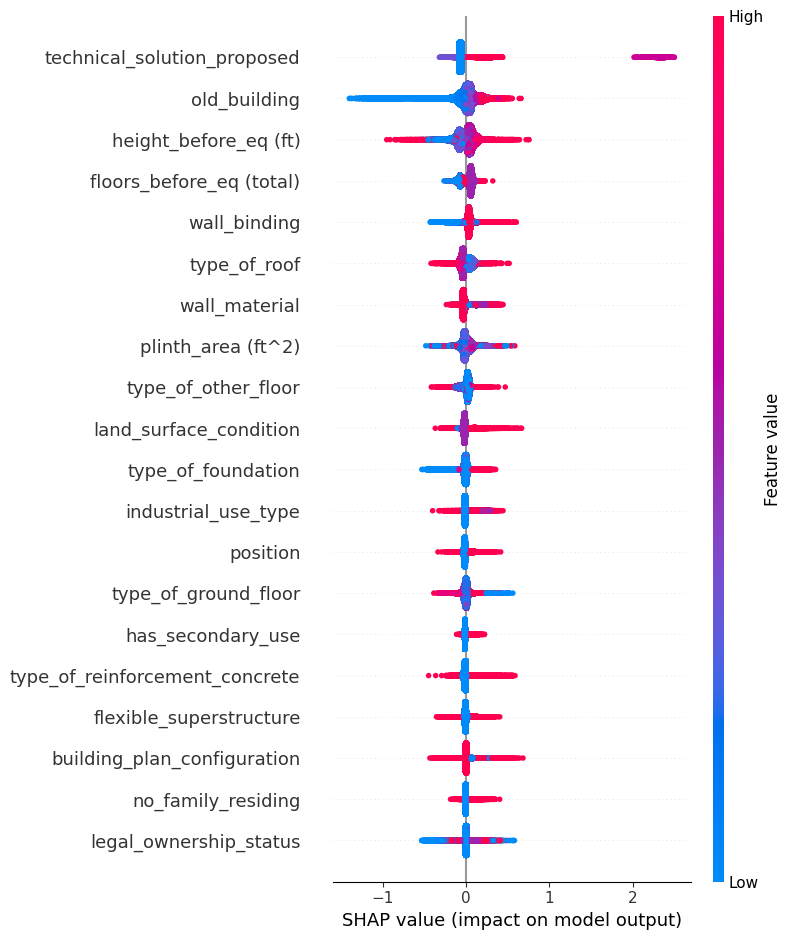

In [ ]:
# Memvisualisasikan nilai SHAP kelas 2
class_index = 2
shap_values_class = shap_values[class_index]

# Plot nilai SHAP untuk setiap fitur
shap.summary_plot(shap_values_class, X_train, feature_names=X_train.columns)

### Shape Values Kelas 3

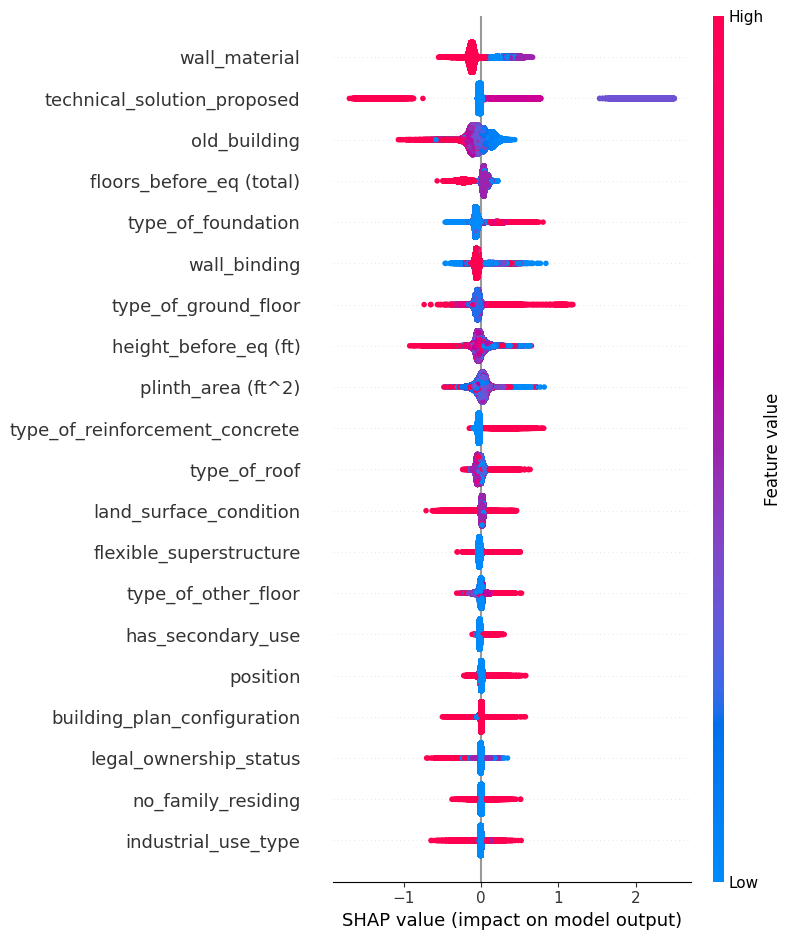

In [ ]:
# Memvisualisasikan nilai SHAP kelas 3
class_index = 3
shap_values_class = shap_values[class_index]

# Plot nilai SHAP untuk setiap fitur
shap.summary_plot(shap_values_class, X_train, feature_names=X_train.columns)

### Shap 1 sampel prediksi

In [ ]:
# Plot nilai SHAP untuk satu sampel prediksi
shap.initjs()
shap.force_plot(explainer.expected_value[class_index], shap_values_class[0, :], X_train.iloc[0, :], feature_names=X_train.columns)

# Buat File Submit di sini

In [ ]:
y_pred = best_model.predict(df3)
# Make 1 dimensional array
y_pred = y_pred.flatten()

y_pred

array([5, 4, 1, ..., 5, 5, 2])

In [ ]:
best_model

In [ ]:
# Create a DataFrame for submission
submission = pd.DataFrame({
    'ID': sub['ID'],
    'damage_grade': y_pred
})

# Print the submission
print(submission)

           ID  damage_grade
0       71840             5
1       85155             4
2      287066             1
3      124951             4
4       73581             5
...       ...           ...
77498  238185             3
77499  290899             1
77500  184490             5
77501  342028             5
77502  386710             2

[77503 rows x 2 columns]


In [ ]:
# vALUE COUNT Y_PRED
submission['damage_grade'].value_counts()

damage_grade
5    29617
4    16993
1    12242
3    11820
2     6831
Name: count, dtype: int64

In [ ]:
# Convert to CSV
submission.to_csv('submission_malam_5.csv', index=False)

# Save model di sini

In [ ]:
import pickle

# save the iris classification model as a pickle file
model_pkl_file = "catbost_proporsional.pkl"

with open(model_pkl_file, 'wb') as file:
    pickle.dump(cb, file)


In [ ]:
# load model from pickle file
with open(model_pkl_file, 'rb') as file:
    model = pickle.load(file)

# evaluate model
y_predict = model.predict(X_test)

# check results
print(classification_report(y_test, y_predict))